ReadME 1

Steps we are following (28/6/24)
1. Load the Dataset
2. Append 1 Comn - 'Administrative Region to the dataset'
3. Run Linear Regression Model for all distinct Admin Region and store the value of slope(m) for each District. {4 Slopes for 4 Admin Regions}
4. Find predictive values for 4 perturbations - [-20%, -10%, 10%, 20%]
5. Store the data

In [261]:
import pandas as pd
import numpy as np

In [262]:
import re
def remove_pattern(col_name):
    return re.sub(r'_[0-9]{3}$', '', col_name)

# Coloumn names are to be cleaned before accessing.

In [263]:
Rice_Casefile = pd.read_csv('Params/3_parameters_multicollinearity_rice.csv')
Rice_Casefile[:5]

,AreaUnderCereals_Paddy,TotalNPK,NetAreaIrrigated_Canals_NetAreaIrrigated
0,782.0,513.822990,0.000000
1,736.0,167.835355,0.000000
2,4468.0,257.908893,272.509463
3,1297.0,183.032957,9.283245
4,98259.0,21197.529554,18037.386429


In [264]:
Maize_Casefile = pd.read_csv('Params/Maize_Case_File_4_Parameters.csv')
Maize_Casefile[:5]

,SowingSeedsDistributed_Maize_320,LivestockCensus_2012_Cattle_354,AreaUnderCereals_Maize_193,TotalNPK_315
0,4.45,2567.461578,1129,438.180210
1,134.73,25037.139270,14867,3036.080250
2,260.15,7729.614277,1987,222.225258
3,5004.00,83821.593090,92194,10902.406570
4,6124.60,85657.632090,173400,25702.835480


In [265]:
Groundnut_Casefile = pd.read_csv('Params/4_parameters_multicollinearity_groundnut.csv')
Groundnut_Casefile[:5]

,AreaUnderOilSeeds_GroundNut,MotorVehicles_Tractors,LivestockCensus_2012_Sheep,TotalNPK
0,72,6.785923,35.835866,10.806111
1,175,0.748134,95.228861,14.687376
2,3307,156.804614,2102.339270,102.712727
3,96711,1423.861199,72011.816530,2748.901666
4,15279,233.171480,2474.543782,718.500139


In [266]:
Zones = pd.read_excel('Zones.xlsx')
Dataset = pd.read_csv('KAG 2016-17/Agriculture/Agriculture_KAG_2016_17.csv')
Dataset.columns = map(remove_pattern, Dataset.columns)

# Loading Case-File
Working_Directory = Dataset[['District', 'Rice_Production','Maize_Production','Groundnut_Production','TotalNPK', 'SowingSeedsDistributed_Maize','LivestockCensus_2012_Cattle','AreaUnderCereals_Maize','AreaUnderCereals_Paddy',
'NetAreaIrrigated_Canals_NetAreaIrrigated','AreaUnderOilSeeds_GroundNut','MotorVehicles_Tractors','LivestockCensus_2012_Sheep','NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea']].copy()

Dataset['Total_Production'] = Dataset['TotalCerealsandMinorMillets_Production'] + Dataset['TotalOilSeeds_Production'] + Dataset['TotalFoodGrains'] + Dataset['TotalGourdVarietyVegetables']

Working_Directory[:5]

,District,Rice_Production,Maize_Production,Groundnut_Production,TotalNPK,SowingSeedsDistributed_Maize,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,AreaUnderCereals_Paddy,NetAreaIrrigated_Canals_NetAreaIrrigated,AreaUnderOilSeeds_GroundNut,MotorVehicles_Tractors,LivestockCensus_2012_Sheep,NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea
0,BENGALURU,3376,2879,71,23310,4.45,136582,1129,782,0,72,14638,77302,9348
1,BENGALURU(R),2354,42583,206,19259,134.73,158820,14867,736,0,175,981,124870,20281
2,RAMANAGARA,12128,10450,4830,7472,260.15,259897,1987,4468,7895,3307,11407,152938,23868
3,CHITRADURGA,4566,271975,68575,35884,5004.00,275889,92194,1297,1820,96711,18587,940038,92506
4,DAVANAGERE,489505,593544,16592,99644,6124.60,332075,173400,98259,84789,15279,32337,343178,78364


In [267]:
# For Vijayanagra and Ballari - division by 2
row_index = 24
count = 1
# Divide all numeric values in the specified row by 2
for col in Working_Directory.columns:
    if count==1 or count>9:
        count = count + 1
    else:
        Working_Directory.at[row_index, col] = Working_Directory.at[row_index, col] / 2
        count = count + 1

Working_Directory['Rice_Ratio'] = Dataset['Rice_Production']/Dataset['Total_Production']
Working_Directory['Maize_Ratio'] = Dataset['Maize_Production']/Dataset['Total_Production']
Working_Directory['Groundnut_Ratio'] = Dataset['Groundnut_Production']/Dataset['Total_Production']

Working_Directory['Admin_Zone'] = Zones['Administrative Region']

Working_Directory[:5]

,District,Rice_Production,Maize_Production,Groundnut_Production,TotalNPK,SowingSeedsDistributed_Maize,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,AreaUnderCereals_Paddy,NetAreaIrrigated_Canals_NetAreaIrrigated,AreaUnderOilSeeds_GroundNut,MotorVehicles_Tractors,LivestockCensus_2012_Sheep,NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea,Rice_Ratio,Maize_Ratio,Groundnut_Ratio,Admin_Zone
0,BENGALURU,3376.0,2879,71.0,23310.0,4.45,136582.0,1129.0,782.0,0,72,14638,77302,9348,0.022043,0.018798,0.000464,Bengaluru Division
1,BENGALURU(R),2354.0,42583,206.0,19259.0,134.73,158820.0,14867.0,736.0,0,175,981,124870,20281,0.008715,0.157645,0.000763,Bengaluru Division
2,RAMANAGARA,12128.0,10450,4830.0,7472.0,260.15,259897.0,1987.0,4468.0,7895,3307,11407,152938,23868,0.034517,0.029741,0.013746,Bengaluru Division
3,CHITRADURGA,4566.0,271975,68575.0,35884.0,5004.00,275889.0,92194.0,1297.0,1820,96711,18587,940038,92506,0.005101,0.303824,0.076605,Bengaluru Division
4,DAVANAGERE,489505.0,593544,16592.0,99644.0,6124.60,332075.0,173400.0,98259.0,84789,15279,32337,343178,78364,0.212733,0.257947,0.007211,Bengaluru Division


In [268]:
if Working_Directory.shape[0] < 31 or Working_Directory.iloc[30, 0] != "VIJAYANAGARA":
    row_24 = Working_Directory.iloc[24, 1:].values
    new_row = pd.DataFrame([['VIJAYANAGARA'] + list(row_24)], columns=Working_Directory.columns)
    Working_Directory = pd.concat([Working_Directory, new_row], ignore_index=True)

Working_Directory.to_csv('Working_Directory.csv',index=False)
Working_Directory[24:]

,District,Rice_Production,Maize_Production,Groundnut_Production,TotalNPK,SowingSeedsDistributed_Maize,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,AreaUnderCereals_Paddy,NetAreaIrrigated_Canals_NetAreaIrrigated,AreaUnderOilSeeds_GroundNut,MotorVehicles_Tractors,LivestockCensus_2012_Sheep,NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea,Rice_Ratio,Maize_Ratio,Groundnut_Ratio,Admin_Zone
24,BALLARI,206115.5,104045,22938.5,61664.5,2859.005,172038.5,49869.5,46832.5,77607,49762,24001,756270,75198,0.269990,0.136288,0.030047,Kalaburagi Division
25,BIDAR,2036.0,2791,261.0,24658.0,24.550,234519.0,1382.0,1548.0,0,299,5256,88402,19908,0.007378,0.010114,0.000946,Kalaburagi Division
26,KALABURAGI,7888.0,14621,3114.0,53999.0,165.000,473117.0,2634.0,4199.0,20864,3817,16351,100061,48802,0.007095,0.013150,0.002801,Kalaburagi Division
27,YADGIRI,224659.0,2673,31435.0,91389.0,0.000,310727.0,961.0,49358.0,91141,38840,9902,463482,22035,0.339006,0.004033,0.047435,Kalaburagi Division
28,RAICHUR,492342.0,723,26958.0,117235.0,14.350,359124.0,2600.0,115246.0,111512,35960,25612,647549,26571,0.357505,0.000525,0.019575,Kalaburagi Division
29,KOPPAL,243505.0,190252,29982.0,73552.0,5292.000,260408.0,48210.0,50753.0,37736,22274,16317,547061,82552,0.191373,0.149521,0.023563,Kalaburagi Division
30,VIJAYANAGARA,206115.5,104045,22938.5,61664.5,2859.005,172038.5,49869.5,46832.5,77607,49762,24001,756270,75198,0.269990,0.136288,0.030047,Kalaburagi Division


In [269]:
Working_Directory.shape

(31, 18)

In [270]:
# Working_Directory = Working_Directory.drop(10).reset_index(drop=True)

In [271]:
Working_Directory

,District,Rice_Production,Maize_Production,Groundnut_Production,TotalNPK,SowingSeedsDistributed_Maize,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,AreaUnderCereals_Paddy,NetAreaIrrigated_Canals_NetAreaIrrigated,AreaUnderOilSeeds_GroundNut,MotorVehicles_Tractors,LivestockCensus_2012_Sheep,NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea,Rice_Ratio,Maize_Ratio,Groundnut_Ratio,Admin_Zone
0,BENGALURU,3376.0,2879,71.0,23310.0,4.450,136582.0,1129.0,782.0,0,72,14638,77302,9348,0.022043,0.018798,0.000464,Bengaluru Division
1,BENGALURU(R),2354.0,42583,206.0,19259.0,134.730,158820.0,14867.0,736.0,0,175,981,124870,20281,0.008715,0.157645,0.000763,Bengaluru Division
2,RAMANAGARA,12128.0,10450,4830.0,7472.0,260.150,259897.0,1987.0,4468.0,7895,3307,11407,152938,23868,0.034517,0.029741,0.013746,Bengaluru Division
3,CHITRADURGA,4566.0,271975,68575.0,35884.0,5004.000,275889.0,92194.0,1297.0,1820,96711,18587,940038,92506,0.005101,0.303824,0.076605,Bengaluru Division
4,DAVANAGERE,489505.0,593544,16592.0,99644.0,6124.600,332075.0,173400.0,98259.0,84789,15279,32337,343178,78364,0.212733,0.257947,0.007211,Bengaluru Division
5,KOLAR,864.0,1759,5810.0,22190.0,51.500,229036.0,640.0,395.0,0,8608,16855,445100,20140,0.004887,0.009950,0.032864,Bengaluru Division
6,CHIKKABALLAPURA,2698.0,105491,7132.0,28357.0,3538.150,246339.0,59377.0,1333.0,0,19535,11411,432691,50370,0.007393,0.289061,0.019543,Bengaluru Division
7,SHIVAMOGGA,384974.0,226532,248.0,56609.0,3814.020,568476.0,43827.0,109617.0,42502,438,17941,36791,32347,0.313060,0.184215,0.000202,Bengaluru Division
8,TUMAKURU,26042.0,66868,39626.0,38148.0,1639.850,527067.0,24207.0,10379.0,4099,64771,26534,1061330,144708,0.028037,0.071991,0.042662,Bengaluru Division
9,CHIKKAMAGALURU,110533.0,61353,3909.0,67863.0,2923.790,337576.0,25831.0,33036.0,6210,5851,15882,91312,26174,0.216529,0.120188,0.007658,Mysuru Division


In [272]:
import plotly.express as px

Case_file_melt = Working_Directory[['Rice_Production','Maize_Production']].melt(var_name='Crop', value_name='Production Value')

# Create box plots for each column
fig = px.box(Case_file_melt[1:], x='Crop', y='Production Value', title='Box Plot of Rice Production',points = "all")

# Show the figure
fig.show()


In [273]:
# Rice Factors (up to factor 9)
Rice_Factor1_1, Rice_Factor1_2, Rice_Factor1_3, Rice_Factor1_4 = [], [], [], []
Rice_Factor2_1, Rice_Factor2_2, Rice_Factor2_3, Rice_Factor2_4 = [], [], [], []
Rice_Factor3_1, Rice_Factor3_2, Rice_Factor3_3, Rice_Factor3_4 = [], [], [], []
Rice_Factor4_1, Rice_Factor4_2, Rice_Factor4_3, Rice_Factor4_4 = [], [], [], []
Rice_Factor5_1, Rice_Factor5_2, Rice_Factor5_3, Rice_Factor5_4 = [], [], [], []
Rice_Factor6_1, Rice_Factor6_2, Rice_Factor6_3, Rice_Factor6_4 = [], [], [], []
Rice_Factor7_1, Rice_Factor7_2, Rice_Factor7_3, Rice_Factor7_4 = [], [], [], []
Rice_Factor8_1, Rice_Factor8_2, Rice_Factor8_3, Rice_Factor8_4 = [], [], [], []
Rice_Factor9_1, Rice_Factor9_2, Rice_Factor9_3, Rice_Factor9_4 = [], [], [], []
Rice_Factor10_1, Rice_Factor10_2, Rice_Factor10_3, Rice_Factor10_4 = [], [], [], []

# Maize Factors (up to factor 9)
Maize_Factor1_1, Maize_Factor1_2, Maize_Factor1_3, Maize_Factor1_4 = [], [], [], []
Maize_Factor2_1, Maize_Factor2_2, Maize_Factor2_3, Maize_Factor2_4 = [], [], [], []
Maize_Factor3_1, Maize_Factor3_2, Maize_Factor3_3, Maize_Factor3_4 = [], [], [], []
Maize_Factor4_1, Maize_Factor4_2, Maize_Factor4_3, Maize_Factor4_4 = [], [], [], []
Maize_Factor5_1, Maize_Factor5_2, Maize_Factor5_3, Maize_Factor5_4 = [], [], [], []
Maize_Factor6_1, Maize_Factor6_2, Maize_Factor6_3, Maize_Factor6_4 = [], [], [], []
Maize_Factor7_1, Maize_Factor7_2, Maize_Factor7_3, Maize_Factor7_4 = [], [], [], []
Maize_Factor8_1, Maize_Factor8_2, Maize_Factor8_3, Maize_Factor8_4 = [], [], [], []
Maize_Factor9_1, Maize_Factor9_2, Maize_Factor9_3, Maize_Factor9_4 = [], [], [], []
Maize_Factor10_1, Maize_Factor10_2, Maize_Factor10_3, Maize_Factor10_4 = [], [], [], []

# Groundnut Factors (up to factor 9)
Groundnut_Factor1_1, Groundnut_Factor1_2, Groundnut_Factor1_3, Groundnut_Factor1_4 = [], [], [], []
Groundnut_Factor2_1, Groundnut_Factor2_2, Groundnut_Factor2_3, Groundnut_Factor2_4 = [], [], [], []
Groundnut_Factor3_1, Groundnut_Factor3_2, Groundnut_Factor3_3, Groundnut_Factor3_4 = [], [], [], []
Groundnut_Factor4_1, Groundnut_Factor4_2, Groundnut_Factor4_3, Groundnut_Factor4_4 = [], [], [], []
Groundnut_Factor5_1, Groundnut_Factor5_2, Groundnut_Factor5_3, Groundnut_Factor5_4 = [], [], [], []
Groundnut_Factor6_1, Groundnut_Factor6_2, Groundnut_Factor6_3, Groundnut_Factor6_4 = [], [], [], []
Groundnut_Factor7_1, Groundnut_Factor7_2, Groundnut_Factor7_3, Groundnut_Factor7_4 = [], [], [], []
Groundnut_Factor8_1, Groundnut_Factor8_2, Groundnut_Factor8_3, Groundnut_Factor8_4 = [], [], [], []
Groundnut_Factor9_1, Groundnut_Factor9_2, Groundnut_Factor9_3, Groundnut_Factor9_4 = [], [], [], []
Groundnut_Factor10_1, Groundnut_Factor10_2, Groundnut_Factor10_3, Groundnut_Factor10_4 = [], [], [], []

# Factors to be considered
factors = [
    'TotalNPK', 'SowingSeedsDistributed_Maize','LivestockCensus_2012_Cattle',
    'AreaUnderCereals_Maize','AreaUnderCereals_Paddy',
    'NetAreaIrrigated_Canals_NetAreaIrrigated','AreaUnderOilSeeds_GroundNut',
    'MotorVehicles_Tractors','LivestockCensus_2012_Sheep','NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea'
]

# Iterate through the DataFrame and append factor values to corresponding lists - Division wise.
for i in range(len(Working_Directory)):
    admin_zone = Working_Directory['Admin_Zone'][i]
    rice_ratio = Working_Directory['Rice_Ratio'][i]
    maize_ratio = Working_Directory['Maize_Ratio'][i]
    groundnut_ratio = Working_Directory['Groundnut_Ratio'][i]  # Assuming Groundnut_Ratio exists

    for j, factor in enumerate(factors, 1):  # FCR*Factor is also calculated in above 2 lines of code.
        if j == 2 or j == 4 or j == 5 or j == 7: # Specifically for the factors that shouldn't be FCR'ed
            rice_value = Working_Directory[factor][i] 
            maize_value = Working_Directory[factor][i] 
            groundnut_value = Working_Directory[factor][i]
        else:
            rice_value = Working_Directory[factor][i] * rice_ratio
            maize_value = Working_Directory[factor][i] * maize_ratio
            groundnut_value = Working_Directory[factor][i] * groundnut_ratio

        # Assign values based on the Admin Zone
        if admin_zone == 'Bengaluru Division':
            eval(f"Rice_Factor{j}_1").append(rice_value)
            eval(f"Maize_Factor{j}_1").append(maize_value)
            eval(f"Groundnut_Factor{j}_1").append(groundnut_value)
        elif admin_zone == 'Mysuru Division':
            eval(f"Rice_Factor{j}_2").append(rice_value)
            eval(f"Maize_Factor{j}_2").append(maize_value)
            eval(f"Groundnut_Factor{j}_2").append(groundnut_value)
        elif admin_zone == 'Belagavi Division':
            eval(f"Rice_Factor{j}_3").append(rice_value)
            eval(f"Maize_Factor{j}_3").append(maize_value)
            eval(f"Groundnut_Factor{j}_3").append(groundnut_value)
        else:
            eval(f"Rice_Factor{j}_4").append(rice_value)
            eval(f"Maize_Factor{j}_4").append(maize_value)
            eval(f"Groundnut_Factor{j}_4").append(groundnut_value)

# Display the lengths of the lists to confirm
print(len(Rice_Factor1_1), len(Rice_Factor1_2), len(Rice_Factor1_3), len(Rice_Factor1_4))
print(len(Maize_Factor1_1), len(Maize_Factor1_2), len(Maize_Factor1_3), len(Maize_Factor1_4))
print(len(Groundnut_Factor1_1), len(Groundnut_Factor1_2), len(Groundnut_Factor1_3), len(Groundnut_Factor1_4))

9 8 7 7
9 8 7 7
9 8 7 7


In [274]:
# Adding Maize factors to the Working_Directory as new columns
Working_Directory['Maize_NPK'] = Maize_Factor1_1 + Maize_Factor1_2 + Maize_Factor1_3 + Maize_Factor1_4
Working_Directory['Maize_MSeeds'] = Maize_Factor2_1 + Maize_Factor2_2 + Maize_Factor2_3 + Maize_Factor2_4
Working_Directory['Maize_Cattle'] = Maize_Factor3_1 + Maize_Factor3_2 + Maize_Factor3_3 + Maize_Factor3_4
Working_Directory['Maize_MArea'] = Maize_Factor4_1 + Maize_Factor4_2 + Maize_Factor4_3 + Maize_Factor4_4
Working_Directory['Maize_PArea'] = Maize_Factor5_1 + Maize_Factor5_2 + Maize_Factor5_3 + Maize_Factor5_4
Working_Directory['Maize_Canal'] = Maize_Factor6_1 + Maize_Factor6_2 + Maize_Factor6_3 + Maize_Factor6_4
Working_Directory['Maize_GArea'] = Maize_Factor7_1 + Maize_Factor7_2 + Maize_Factor7_3 + Maize_Factor7_4
Working_Directory['Maize_Tractors'] = Maize_Factor8_1 + Maize_Factor8_2 + Maize_Factor8_3 + Maize_Factor8_4
Working_Directory['Maize_Sheep'] = Maize_Factor9_1 + Maize_Factor9_2 + Maize_Factor9_3 + Maize_Factor9_4
Working_Directory['Maize_Tubewells'] = Maize_Factor10_1 + Maize_Factor10_2 + Maize_Factor10_3 + Maize_Factor10_4

# Adding Rice factors to the Working_Directory as new columns
Working_Directory['Rice_NPK'] = Rice_Factor1_1 + Rice_Factor1_2 + Rice_Factor1_3 + Rice_Factor1_4
Working_Directory['Rice_MSeeds'] = Rice_Factor2_1 + Rice_Factor2_2 + Rice_Factor2_3 + Rice_Factor2_4
Working_Directory['Rice_Cattle'] = Rice_Factor3_1 + Rice_Factor3_2 + Rice_Factor3_3 + Rice_Factor3_4
Working_Directory['Rice_MArea'] = Rice_Factor4_1 + Rice_Factor4_2 + Rice_Factor4_3 + Rice_Factor4_4
Working_Directory['Rice_PArea'] = Rice_Factor5_1 + Rice_Factor5_2 + Rice_Factor5_3 + Rice_Factor5_4
Working_Directory['Rice_Canal'] = Rice_Factor6_1 + Rice_Factor6_2 + Rice_Factor6_3 + Rice_Factor6_4
Working_Directory['Rice_GArea'] = Rice_Factor7_1 + Rice_Factor7_2 + Rice_Factor7_3 + Rice_Factor7_4
Working_Directory['Rice_Tractors'] = Rice_Factor8_1 + Rice_Factor8_2 + Rice_Factor8_3 + Rice_Factor8_4
Working_Directory['Rice_Sheep'] = Rice_Factor9_1 + Rice_Factor9_2 + Rice_Factor9_3 + Rice_Factor9_4
Working_Directory['Rice_Tubewells'] = Rice_Factor10_1 + Rice_Factor10_2 + Rice_Factor10_3 + Rice_Factor10_4

# Groundnut factors up to factor 9
Working_Directory['Groundnut_NPK'] = Groundnut_Factor1_1 + Groundnut_Factor1_2 + Groundnut_Factor1_3 + Groundnut_Factor1_4
Working_Directory['Groundnut_MSeeds'] = Groundnut_Factor2_1 + Groundnut_Factor2_2 + Groundnut_Factor2_3 + Groundnut_Factor2_4
Working_Directory['Groundnut_Cattle'] = Groundnut_Factor3_1 + Groundnut_Factor3_2 + Groundnut_Factor3_3 + Groundnut_Factor3_4
Working_Directory['Groundnut_MArea'] = Groundnut_Factor4_1 + Groundnut_Factor4_2 + Groundnut_Factor4_3 + Groundnut_Factor4_4
Working_Directory['Groundnut_PArea'] = Groundnut_Factor5_1 + Groundnut_Factor5_2 + Groundnut_Factor5_3 + Groundnut_Factor5_4
Working_Directory['Groundnut_Canal'] = Groundnut_Factor6_1 + Groundnut_Factor6_2 + Groundnut_Factor6_3 + Groundnut_Factor6_4
Working_Directory['Groundnut_GArea'] = Groundnut_Factor7_1 + Groundnut_Factor7_2 + Groundnut_Factor7_3 + Groundnut_Factor7_4
Working_Directory['Groundnut_Tractors'] = Groundnut_Factor8_1 + Groundnut_Factor8_2 + Groundnut_Factor8_3 + Groundnut_Factor8_4
Working_Directory['Groundnut_Sheep'] = Groundnut_Factor9_1 + Groundnut_Factor9_2 + Groundnut_Factor9_3 + Groundnut_Factor9_4
Working_Directory['Groundnut_Tubewells'] = Groundnut_Factor10_1 + Groundnut_Factor10_2 + Groundnut_Factor10_3 + Groundnut_Factor10_4

In [275]:
Maize_Factor2_1

[4.45, 134.73, 260.15, 5004.0, 6124.6, 51.5, 3538.15, 3814.02, 1639.85]

In [276]:
abbreviation_mapping = {
    'BENGALURU': 'BLR',
    'BENGALURU(R)': 'BLR(R)',
    'RAMANAGARA': 'RGA',
    'CHITRADURGA': 'CDA',
    'DAVANAGERE': 'DVG',
    'KOLAR': 'KLR',
    'CHIKKABALLAPURA': 'CKA',
    'SHIVAMOGGA': 'SMG',
    'TUMAKURU': 'TKR',
    'CHIKKAMAGALURU': 'CMG',
    'DAKSHINA KANNADA': 'DKA',
    'UDUPI': 'UPI',
    'HASSAN': 'HSN',
    'KODAGU': 'KDG',
    'MANDYA': 'MDY',
    'MYSURU': 'MYS',
    'CHAMARAJANAGAR': 'CNR',
    'BELAGAVI': 'BLG',
    'VIJAYAPURA': 'VJP',
    'BAGALKOT': 'BKT',
    'DHARAWAD': 'DWD',
    'GADAG': 'GDG',
    'HAVERI': 'HVR',
    'UTTARA KANNADA': 'UTK',
    'BALLARI': 'BLL',
    'BIDAR': 'BDR',
    'KALABURAGI': 'KLB',
    'YADGIRI': 'YDR',
    'RAICHUR': 'RCR',
    'KOPPAL': 'KPL',
    'VIJAYANAGARA': 'VNG',
}

Working_Directory['Abbreviation'] = Working_Directory['District'].map(abbreviation_mapping)
Working_Directory[:5]

# Create a dictionary to map district names
district_mapping = {
    'BENGALURU': 'Bengaluru Urban',
    'BENGALURU(R)': 'Bengaluru Rural',
    'RAMANAGARA': 'Ramanagara',
    'CHITRADURGA': 'Chitradurga',
    'DAVANAGERE': 'Davanagere',
    'KOLAR': 'Kolar',
    'CHIKKABALLAPURA': 'Chikkaballapura',
    'SHIVAMOGGA': 'Shivamogga',
    'TUMAKURU': 'Tumakuru',
    'CHIKKAMAGALURU': 'Chikkamagaluru',
    'DAKSHINA KANNADA': 'Dakshina Kannada',
    'UDUPI': 'Udupi',
    'HASSAN': 'Hassan',
    'KODAGU': 'Kodagu',
    'MANDYA': 'Mandya',
    'MYSURU': 'Mysuru',
    'CHAMARAJANAGAR': 'Chamarajanagara',
    'BELAGAVI': 'Belagavi',
    'VIJAYAPURA': 'Vijayapura',
    'BAGALKOT': 'Bagalkote',
    'DHARAWAD': 'Dharwad',
    'GADAG': 'Gadag',
    'HAVERI': 'Haveri',
    'UTTARA KANNADA': 'Uttara Kannada',
    'BALLARI': 'Ballari',
    'BIDAR': 'Bidar',
    'KALABURAGI': 'Kalaburagi',
    'YADGIRI': 'Yadgir',
    'RAICHUR': 'Raichur',
    'KOPPAL': 'Koppal',
    'VIJAYANAGARA': 'Vijayanagara'
}

Working_Directory['KDG_District'] = Working_Directory['District'].map(district_mapping)

print(Working_Directory[['District', 'KDG_District']])

            District      KDG_District
0          BENGALURU   Bengaluru Urban
1       BENGALURU(R)   Bengaluru Rural
2         RAMANAGARA        Ramanagara
3        CHITRADURGA       Chitradurga
4         DAVANAGERE        Davanagere
5              KOLAR             Kolar
6    CHIKKABALLAPURA   Chikkaballapura
7         SHIVAMOGGA        Shivamogga
8           TUMAKURU          Tumakuru
9     CHIKKAMAGALURU    Chikkamagaluru
10  DAKSHINA KANNADA  Dakshina Kannada
11             UDUPI             Udupi
12            HASSAN            Hassan
13            KODAGU            Kodagu
14            MANDYA            Mandya
15            MYSURU            Mysuru
16    CHAMARAJANAGAR   Chamarajanagara
17          BELAGAVI          Belagavi
18        VIJAYAPURA        Vijayapura
19          BAGALKOT         Bagalkote
20          DHARAWAD           Dharwad
21             GADAG             Gadag
22            HAVERI            Haveri
23    UTTARA KANNADA    Uttara Kannada
24           BALLARI     

In [277]:
# Initializing Factor 0 lists for Rice, Maize, and Groundnut
Rice_Factor0_1, Rice_Factor0_2, Rice_Factor0_3, Rice_Factor0_4 = [], [], [], []
Maize_Factor0_1, Maize_Factor0_2, Maize_Factor0_3, Maize_Factor0_4 = [], [], [], []
Groundnut_Factor0_1, Groundnut_Factor0_2, Groundnut_Factor0_3, Groundnut_Factor0_4 = [], [], [], []

# Loop through the Working_Directory DataFrame to assign production values to corresponding factor lists
for i in range(len(Working_Directory['Admin_Zone'])):
    if Working_Directory['Admin_Zone'][i] == 'Bengaluru Division':            
        Rice_Factor0_1.append(Working_Directory['Rice_Production'][i])
        Maize_Factor0_1.append(Working_Directory['Maize_Production'][i])
        Groundnut_Factor0_1.append(Working_Directory['Groundnut_Production'][i])
    elif Working_Directory['Admin_Zone'][i] == 'Mysuru Division':
        Rice_Factor0_2.append(Working_Directory['Rice_Production'][i])
        Maize_Factor0_2.append(Working_Directory['Maize_Production'][i])
        Groundnut_Factor0_2.append(Working_Directory['Groundnut_Production'][i])
    elif Working_Directory['Admin_Zone'][i] == 'Belagavi Division':
        Rice_Factor0_3.append(Working_Directory['Rice_Production'][i])
        Maize_Factor0_3.append(Working_Directory['Maize_Production'][i])
        Groundnut_Factor0_3.append(Working_Directory['Groundnut_Production'][i])
    elif Working_Directory['Admin_Zone'][i] == 'Kalaburagi Division':
        Rice_Factor0_4.append(Working_Directory['Rice_Production'][i])
        Maize_Factor0_4.append(Working_Directory['Maize_Production'][i])
        Groundnut_Factor0_4.append(Working_Directory['Groundnut_Production'][i])

In [278]:
Working_Directory[:5]

,District,Rice_Production,Maize_Production,Groundnut_Production,TotalNPK,SowingSeedsDistributed_Maize,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,AreaUnderCereals_Paddy,NetAreaIrrigated_Canals_NetAreaIrrigated,...,Groundnut_Cattle,Groundnut_MArea,Groundnut_PArea,Groundnut_Canal,Groundnut_GArea,Groundnut_Tractors,Groundnut_Sheep,Groundnut_Tubewells,Abbreviation,KDG_District
0,BENGALURU,3376.0,2879,71.0,23310.0,4.45,136582.0,1129.0,782.0,0,...,63.317045,1129.0,782.0,0.000000,72,6.785923,35.835866,4.333571,BLR,Bengaluru Urban
1,BENGALURU(R),2354.0,42583,206.0,19259.0,134.73,158820.0,14867.0,736.0,0,...,121.119947,14867.0,736.0,0.000000,175,0.748134,95.228861,15.466778,BLR(R),Bengaluru Rural
2,RAMANAGARA,12128.0,10450,4830.0,7472.0,260.15,259897.0,1987.0,4468.0,7895,...,3572.635116,1987.0,4468.0,108.527433,3307,156.804614,2102.339270,328.097881,RGA,Ramanagara
3,CHITRADURGA,4566.0,271975,68575.0,35884.0,5004.00,275889.0,92194.0,1297.0,1820,...,21134.537168,92194.0,1297.0,139.421498,96711,1423.861199,72011.816530,7086.442356,CDA,Chitradurga
4,DAVANAGERE,489505.0,593544,16592.0,99644.0,6124.60,332075.0,173400.0,98259.0,84789,...,2394.483697,173400.0,98259.0,611.385615,15279,233.171480,2474.543782,565.057052,DVG,Davanagere


In [279]:
Working_Directory.shape

(31, 50)

In [280]:
Rice_Factor0_4

[206115.5, 2036.0, 7888.0, 224659.0, 492342.0, 243505.0, 206115.5]

In [281]:
import scipy

# Slope_Factor_Crop_Division = linear regrression (X,Y): (Crop_Factor_Division,Dependent Variable - Crop_Factor0_Division)

Slope_1_Rice_1 = scipy.stats.linregress(Rice_Factor1_1, Rice_Factor0_1)
Slope_1_Rice_2 = scipy.stats.linregress(Rice_Factor1_2, Rice_Factor0_2)
Slope_1_Rice_3 = scipy.stats.linregress(Rice_Factor1_3, Rice_Factor0_3)
Slope_1_Rice_4 = scipy.stats.linregress(Rice_Factor1_4, Rice_Factor0_4)
Slope_2_Rice_1 = scipy.stats.linregress(Rice_Factor2_1, Rice_Factor0_1)
Slope_2_Rice_2 = scipy.stats.linregress(Rice_Factor2_2, Rice_Factor0_2)
Slope_2_Rice_3 = scipy.stats.linregress(Rice_Factor2_3, Rice_Factor0_3)
Slope_2_Rice_4 = scipy.stats.linregress(Rice_Factor2_4, Rice_Factor0_4)
Slope_3_Rice_1 = scipy.stats.linregress(Rice_Factor3_1, Rice_Factor0_1)
Slope_3_Rice_2 = scipy.stats.linregress(Rice_Factor3_2, Rice_Factor0_2)
Slope_3_Rice_3 = scipy.stats.linregress(Rice_Factor3_3, Rice_Factor0_3)
Slope_3_Rice_4 = scipy.stats.linregress(Rice_Factor3_4, Rice_Factor0_4)
Slope_4_Rice_1 = scipy.stats.linregress(Rice_Factor4_1, Rice_Factor0_1)
Slope_4_Rice_2 = scipy.stats.linregress(Rice_Factor4_2, Rice_Factor0_2)
Slope_4_Rice_3 = scipy.stats.linregress(Rice_Factor4_3, Rice_Factor0_3)
Slope_4_Rice_4 = scipy.stats.linregress(Rice_Factor4_4, Rice_Factor0_4)
Slope_5_Rice_1 = scipy.stats.linregress(Rice_Factor5_1, Rice_Factor0_1)
Slope_5_Rice_2 = scipy.stats.linregress(Rice_Factor5_2, Rice_Factor0_2)
Slope_5_Rice_3 = scipy.stats.linregress(Rice_Factor5_3, Rice_Factor0_3)
Slope_5_Rice_4 = scipy.stats.linregress(Rice_Factor5_4, Rice_Factor0_4)
Slope_6_Rice_1 = scipy.stats.linregress(Rice_Factor6_1, Rice_Factor0_1)
Slope_6_Rice_2 = scipy.stats.linregress(Rice_Factor6_2, Rice_Factor0_2)
Slope_6_Rice_3 = scipy.stats.linregress(Rice_Factor6_3, Rice_Factor0_3)
Slope_6_Rice_4 = scipy.stats.linregress(Rice_Factor6_4, Rice_Factor0_4)
Slope_7_Rice_1 = scipy.stats.linregress(Rice_Factor7_1, Rice_Factor0_1)
Slope_7_Rice_2 = scipy.stats.linregress(Rice_Factor7_2, Rice_Factor0_2)
Slope_7_Rice_3 = scipy.stats.linregress(Rice_Factor7_3, Rice_Factor0_3)
Slope_7_Rice_4 = scipy.stats.linregress(Rice_Factor7_4, Rice_Factor0_4)
Slope_8_Rice_1 = scipy.stats.linregress(Rice_Factor8_1, Rice_Factor0_1)
Slope_8_Rice_2 = scipy.stats.linregress(Rice_Factor8_2, Rice_Factor0_2)
Slope_8_Rice_3 = scipy.stats.linregress(Rice_Factor8_3, Rice_Factor0_3)
Slope_8_Rice_4 = scipy.stats.linregress(Rice_Factor8_4, Rice_Factor0_4)
Slope_9_Rice_1 = scipy.stats.linregress(Rice_Factor9_1, Rice_Factor0_1)
Slope_9_Rice_2 = scipy.stats.linregress(Rice_Factor9_2, Rice_Factor0_2)
Slope_9_Rice_3 = scipy.stats.linregress(Rice_Factor9_3, Rice_Factor0_3)
Slope_9_Rice_4 = scipy.stats.linregress(Rice_Factor9_4, Rice_Factor0_4)
Slope_10_Rice_1 = scipy.stats.linregress(Rice_Factor10_1, Rice_Factor0_1)
Slope_10_Rice_2 = scipy.stats.linregress(Rice_Factor10_2, Rice_Factor0_2)
Slope_10_Rice_3 = scipy.stats.linregress(Rice_Factor10_3, Rice_Factor0_3)
Slope_10_Rice_4 = scipy.stats.linregress(Rice_Factor10_4, Rice_Factor0_4)



Slope_1_Maize_1 = scipy.stats.linregress(Maize_Factor1_1, Maize_Factor0_1)
Slope_1_Maize_2 = scipy.stats.linregress(Maize_Factor1_2, Maize_Factor0_2)
Slope_1_Maize_3 = scipy.stats.linregress(Maize_Factor1_3, Maize_Factor0_3)
Slope_1_Maize_4 = scipy.stats.linregress(Maize_Factor1_4, Maize_Factor0_4)
Slope_2_Maize_1 = scipy.stats.linregress(Maize_Factor2_1, Maize_Factor0_1)
Slope_2_Maize_2 = scipy.stats.linregress(Maize_Factor2_2, Maize_Factor0_2)
Slope_2_Maize_3 = scipy.stats.linregress(Maize_Factor2_3, Maize_Factor0_3)
Slope_2_Maize_4 = scipy.stats.linregress(Maize_Factor2_4, Maize_Factor0_4)
Slope_3_Maize_1 = scipy.stats.linregress(Maize_Factor3_1, Maize_Factor0_1)
Slope_3_Maize_2 = scipy.stats.linregress(Maize_Factor3_2, Maize_Factor0_2)
Slope_3_Maize_3 = scipy.stats.linregress(Maize_Factor3_3, Maize_Factor0_3)
Slope_3_Maize_4 = scipy.stats.linregress(Maize_Factor3_4, Maize_Factor0_4)
Slope_4_Maize_1 = scipy.stats.linregress(Maize_Factor4_1, Maize_Factor0_1)
Slope_4_Maize_2 = scipy.stats.linregress(Maize_Factor4_2, Maize_Factor0_2)
Slope_4_Maize_3 = scipy.stats.linregress(Maize_Factor4_3, Maize_Factor0_3)
Slope_4_Maize_4 = scipy.stats.linregress(Maize_Factor4_4, Maize_Factor0_4)
Slope_5_Maize_1 = scipy.stats.linregress(Maize_Factor5_1, Maize_Factor0_1)
Slope_5_Maize_2 = scipy.stats.linregress(Maize_Factor5_2, Maize_Factor0_2)
Slope_5_Maize_3 = scipy.stats.linregress(Maize_Factor5_3, Maize_Factor0_3)
Slope_5_Maize_4 = scipy.stats.linregress(Maize_Factor5_4, Maize_Factor0_4)
Slope_6_Maize_1 = scipy.stats.linregress(Maize_Factor6_1, Maize_Factor0_1)
Slope_6_Maize_2 = scipy.stats.linregress(Maize_Factor6_2, Maize_Factor0_2)
Slope_6_Maize_3 = scipy.stats.linregress(Maize_Factor6_3, Maize_Factor0_3)
Slope_6_Maize_4 = scipy.stats.linregress(Maize_Factor6_4, Maize_Factor0_4)
Slope_7_Maize_1 = scipy.stats.linregress(Maize_Factor7_1, Maize_Factor0_1)
Slope_7_Maize_2 = scipy.stats.linregress(Maize_Factor7_2, Maize_Factor0_2)
Slope_7_Maize_3 = scipy.stats.linregress(Maize_Factor7_3, Maize_Factor0_3)
Slope_7_Maize_4 = scipy.stats.linregress(Maize_Factor7_4, Maize_Factor0_4) 
Slope_8_Maize_1 = scipy.stats.linregress(Maize_Factor8_1, Maize_Factor0_1)
Slope_8_Maize_2 = scipy.stats.linregress(Maize_Factor8_2, Maize_Factor0_2)
Slope_8_Maize_3 = scipy.stats.linregress(Maize_Factor8_3, Maize_Factor0_3)
Slope_8_Maize_4 = scipy.stats.linregress(Maize_Factor8_4, Maize_Factor0_4)
Slope_9_Maize_1 = scipy.stats.linregress(Maize_Factor9_1, Maize_Factor0_1)
Slope_9_Maize_2 = scipy.stats.linregress(Maize_Factor9_2, Maize_Factor0_2)
Slope_9_Maize_3 = scipy.stats.linregress(Maize_Factor9_3, Maize_Factor0_3)
Slope_9_Maize_4 = scipy.stats.linregress(Maize_Factor9_4, Maize_Factor0_4)
Slope_10_Maize_1 = scipy.stats.linregress(Maize_Factor10_1, Maize_Factor0_1)
Slope_10_Maize_2 = scipy.stats.linregress(Maize_Factor10_2, Maize_Factor0_2)
Slope_10_Maize_3 = scipy.stats.linregress(Maize_Factor10_3, Maize_Factor0_3)
Slope_10_Maize_4 = scipy.stats.linregress(Maize_Factor10_4, Maize_Factor0_4)

# Calculating the slopes for Groundnut Factors in all 4 divisions
Slope_1_Groundnut_1 = scipy.stats.linregress(Groundnut_Factor1_1, Groundnut_Factor0_1)
Slope_1_Groundnut_2 = scipy.stats.linregress(Groundnut_Factor1_2, Groundnut_Factor0_2)
Slope_1_Groundnut_3 = scipy.stats.linregress(Groundnut_Factor1_3, Groundnut_Factor0_3)
Slope_1_Groundnut_4 = scipy.stats.linregress(Groundnut_Factor1_4, Groundnut_Factor0_4)
Slope_2_Groundnut_1 = scipy.stats.linregress(Groundnut_Factor2_1, Groundnut_Factor0_1)
Slope_2_Groundnut_2 = scipy.stats.linregress(Groundnut_Factor2_2, Groundnut_Factor0_2)
Slope_2_Groundnut_3 = scipy.stats.linregress(Groundnut_Factor2_3, Groundnut_Factor0_3)
Slope_2_Groundnut_4 = scipy.stats.linregress(Groundnut_Factor2_4, Groundnut_Factor0_4)
Slope_3_Groundnut_1 = scipy.stats.linregress(Groundnut_Factor3_1, Groundnut_Factor0_1)
Slope_3_Groundnut_2 = scipy.stats.linregress(Groundnut_Factor3_2, Groundnut_Factor0_2)
Slope_3_Groundnut_3 = scipy.stats.linregress(Groundnut_Factor3_3, Groundnut_Factor0_3)
Slope_3_Groundnut_4 = scipy.stats.linregress(Groundnut_Factor3_4, Groundnut_Factor0_4)
Slope_4_Groundnut_1 = scipy.stats.linregress(Groundnut_Factor4_1, Groundnut_Factor0_1)
Slope_4_Groundnut_2 = scipy.stats.linregress(Groundnut_Factor4_2, Groundnut_Factor0_2)
Slope_4_Groundnut_3 = scipy.stats.linregress(Groundnut_Factor4_3, Groundnut_Factor0_3)
Slope_4_Groundnut_4 = scipy.stats.linregress(Groundnut_Factor4_4, Groundnut_Factor0_4)
Slope_5_Groundnut_1 = scipy.stats.linregress(Groundnut_Factor5_1, Groundnut_Factor0_1)
Slope_5_Groundnut_2 = scipy.stats.linregress(Groundnut_Factor5_2, Groundnut_Factor0_2)
Slope_5_Groundnut_3 = scipy.stats.linregress(Groundnut_Factor5_3, Groundnut_Factor0_3)
Slope_5_Groundnut_4 = scipy.stats.linregress(Groundnut_Factor5_4, Groundnut_Factor0_4)
Slope_6_Groundnut_1 = scipy.stats.linregress(Groundnut_Factor6_1, Groundnut_Factor0_1)
Slope_6_Groundnut_2 = scipy.stats.linregress(Groundnut_Factor6_2, Groundnut_Factor0_2)
Slope_6_Groundnut_3 = scipy.stats.linregress(Groundnut_Factor6_3, Groundnut_Factor0_3)
Slope_6_Groundnut_4 = scipy.stats.linregress(Groundnut_Factor6_4, Groundnut_Factor0_4)
Slope_7_Groundnut_1 = scipy.stats.linregress(Groundnut_Factor7_1, Groundnut_Factor0_1)
Slope_7_Groundnut_2 = scipy.stats.linregress(Groundnut_Factor7_2, Groundnut_Factor0_2)
Slope_7_Groundnut_3 = scipy.stats.linregress(Groundnut_Factor7_3, Groundnut_Factor0_3)
Slope_7_Groundnut_4 = scipy.stats.linregress(Groundnut_Factor7_4, Groundnut_Factor0_4)
Slope_8_Groundnut_1 = scipy.stats.linregress(Groundnut_Factor8_1, Groundnut_Factor0_1)
Slope_8_Groundnut_2 = scipy.stats.linregress(Groundnut_Factor8_2, Groundnut_Factor0_2)
Slope_8_Groundnut_3 = scipy.stats.linregress(Groundnut_Factor8_3, Groundnut_Factor0_3)
Slope_8_Groundnut_4 = scipy.stats.linregress(Groundnut_Factor8_4, Groundnut_Factor0_4)
Slope_9_Groundnut_1 = scipy.stats.linregress(Groundnut_Factor9_1, Groundnut_Factor0_1)
Slope_9_Groundnut_2 = scipy.stats.linregress(Groundnut_Factor9_2, Groundnut_Factor0_2)
Slope_9_Groundnut_3 = scipy.stats.linregress(Groundnut_Factor9_3, Groundnut_Factor0_3)
Slope_9_Groundnut_4 = scipy.stats.linregress(Groundnut_Factor9_4, Groundnut_Factor0_4)
Slope_10_Groundnut_1 = scipy.stats.linregress(Groundnut_Factor10_1, Groundnut_Factor0_1)
Slope_10_Groundnut_2 = scipy.stats.linregress(Groundnut_Factor10_2, Groundnut_Factor0_2)
Slope_10_Groundnut_3 = scipy.stats.linregress(Groundnut_Factor10_3, Groundnut_Factor0_3)
Slope_10_Groundnut_4 = scipy.stats.linregress(Groundnut_Factor10_4, Groundnut_Factor0_4)

# Slope_Rice_NPK = []
# Slope_Rice_MSeeds = []
# Slope_Rice_Cattle = []
# Slope_Rice_MArea = []
# Slope_Rice_PArea = []
# Slope_Rice_Canal = []
# Slope_Rice_GArea = []
# Slope_Rice_Tractors = []
# Slope_Rice_Sheep = []
# Slope_Rice_Tubewells = []

# Slope_Maize_NPK = []
# Slope_Maize_MSeeds = []
# Slope_Maize_Cattle = []
# Slope_Maize_MArea = []
# Slope_Maize_PArea = []
# Slope_Maize_Canal = []
# Slope_Maize_GArea = []
# Slope_Maize_Tractors = []
# Slope_Maize_Sheep = []
# Slope_Maize_Tubewells = []

# # Appending the slope values for Rice and Maize with 9 factors, Admin Zones wise
# for i in range(len(Working_Directory['Admin_Zone'])):
#     if Working_Directory['Admin_Zone'][i] == 'Bengaluru Division':
       
#         # Rice slopes for Bengaluru Division
#         Slope_Rice_NPK.append(Slope_1_Rice_1.slope)
#         Slope_Rice_MSeeds.append(Slope_2_Rice_1.slope)
#         Slope_Rice_Cattle.append(Slope_3_Rice_1.slope)
#         Slope_Rice_MArea.append(Slope_4_Rice_1.slope)
#         Slope_Rice_PArea.append(Slope_5_Rice_1.slope)
#         Slope_Rice_Canal.append(Slope_6_Rice_1.slope)
#         Slope_Rice_GArea.append(Slope_7_Rice_1.slope)
#         Slope_Rice_Tractors.append(Slope_8_Rice_1.slope)
#         Slope_Rice_Sheep.append(Slope_9_Rice_1.slope)
#         Slope_Rice_Tubewells.append(Slope_10_Rice_1.slope)
        
#         # Maize slopes for Bengaluru Division
#         Slope_Maize_NPK.append(Slope_1_Maize_1.slope)
#         Slope_Maize_MSeeds.append(Slope_2_Maize_1.slope)
#         Slope_Maize_Cattle.append(Slope_3_Maize_1.slope)
#         Slope_Maize_MArea.append(Slope_4_Maize_1.slope)
#         Slope_Maize_PArea.append(Slope_5_Maize_1.slope)
#         Slope_Maize_Canal.append(Slope_6_Maize_1.slope)
#         Slope_Maize_GArea.append(Slope_7_Maize_1.slope)
#         Slope_Maize_Tractors.append(Slope_8_Maize_1.slope)
#         Slope_Maize_Sheep.append(Slope_9_Maize_1.slope)
#         Slope_Maize_Tubewells.append(Slope_10_Maize_1.slope)

#     elif Working_Directory['Admin_Zone'][i] == 'Mysuru Division':
#         # Rice slopes for Mysuru Division
#         Slope_Rice_NPK.append(Slope_1_Rice_2.slope)
#         Slope_Rice_MSeeds.append(Slope_2_Rice_2.slope)
#         Slope_Rice_Cattle.append(Slope_3_Rice_2.slope)
#         Slope_Rice_MArea.append(Slope_4_Rice_2.slope)
#         Slope_Rice_PArea.append(Slope_5_Rice_2.slope)
#         Slope_Rice_Canal.append(Slope_6_Rice_2.slope)
#         Slope_Rice_GArea.append(Slope_7_Rice_2.slope)
#         Slope_Rice_Tractors.append(Slope_8_Rice_2.slope)
#         Slope_Rice_Sheep.append(Slope_9_Rice_2.slope)
#         Slope_Rice_Tubewells.append(Slope_10_Rice_2.slope)
        
#         # Maize slopes for Mysuru Division
#         Slope_Maize_NPK.append(Slope_1_Maize_2.slope)
#         Slope_Maize_MSeeds.append(Slope_2_Maize_2.slope)
#         Slope_Maize_Cattle.append(Slope_3_Maize_2.slope)
#         Slope_Maize_MArea.append(Slope_4_Maize_2.slope)
#         Slope_Maize_PArea.append(Slope_5_Maize_2.slope)
#         Slope_Maize_Canal.append(Slope_6_Maize_2.slope)
#         Slope_Maize_GArea.append(Slope_7_Maize_2.slope)
#         Slope_Maize_Tractors.append(Slope_8_Maize_2.slope)
#         Slope_Maize_Sheep.append(Slope_9_Maize_2.slope)
#         Slope_Maize_Tubewells.append(Slope_10_Maize_2.slope)

#     elif Working_Directory['Admin_Zone'][i] == 'Belagavi Division':
#         # Rice slopes for Belagavi Division
#         Slope_Rice_NPK.append(Slope_1_Rice_3.slope)
#         Slope_Rice_MSeeds.append(Slope_2_Rice_3.slope)
#         Slope_Rice_Cattle.append(Slope_3_Rice_3.slope)
#         Slope_Rice_MArea.append(Slope_4_Rice_3.slope)
#         Slope_Rice_PArea.append(Slope_5_Rice_3.slope)
#         Slope_Rice_Canal.append(Slope_6_Rice_3.slope)
#         Slope_Rice_GArea.append(Slope_7_Rice_3.slope)
#         Slope_Rice_Tractors.append(Slope_8_Rice_3.slope)
#         Slope_Rice_Sheep.append(Slope_9_Rice_3.slope)
#         Slope_Rice_Tubewells.append(Slope_10_Rice_3.slope)

#         # Maize slopes for Belagavi Division
#         Slope_Maize_NPK.append(Slope_1_Maize_3.slope)
#         Slope_Maize_MSeeds.append(Slope_2_Maize_3.slope)
#         Slope_Maize_Cattle.append(Slope_3_Maize_3.slope)
#         Slope_Maize_MArea.append(Slope_4_Maize_3.slope)
#         Slope_Maize_PArea.append(Slope_5_Maize_3.slope)
#         Slope_Maize_Canal.append(Slope_6_Maize_3.slope)
#         Slope_Maize_GArea.append(Slope_7_Maize_3.slope)
#         Slope_Maize_Tractors.append(Slope_8_Maize_3.slope)
#         Slope_Maize_Sheep.append(Slope_9_Maize_3.slope)
#         Slope_Maize_Tubewells.append(Slope_10_Maize_3.slope)

#     else:
#         # Rice slopes for Kalaburagi Division (or any other remaining division)
#         Slope_Rice_NPK.append(Slope_1_Rice_4.slope)
#         Slope_Rice_MSeeds.append(Slope_2_Rice_4.slope)
#         Slope_Rice_Cattle.append(Slope_3_Rice_4.slope)
#         Slope_Rice_MArea.append(Slope_4_Rice_4.slope)
#         Slope_Rice_PArea.append(Slope_5_Rice_4.slope)
#         Slope_Rice_Canal.append(Slope_6_Rice_4.slope)
#         Slope_Rice_GArea.append(Slope_7_Rice_4.slope)
#         Slope_Rice_Tractors.append(Slope_8_Rice_4.slope)
#         Slope_Rice_Sheep.append(Slope_9_Rice_4.slope)
#         Slope_Rice_Tubewells.append(Slope_10_Rice_4.slope)
        
#         # Maize slopes for Kalaburagi Division (or any other remaining division)
#         Slope_Maize_NPK.append(Slope_1_Maize_4.slope)
#         Slope_Maize_MSeeds.append(Slope_2_Maize_4.slope)
#         Slope_Maize_Cattle.append(Slope_3_Maize_4.slope)
#         Slope_Maize_MArea.append(Slope_4_Maize_4.slope)
#         Slope_Maize_PArea.append(Slope_5_Maize_4.slope)
#         Slope_Maize_Canal.append(Slope_6_Maize_4.slope)
#         Slope_Maize_GArea.append(Slope_7_Maize_4.slope)
#         Slope_Maize_Tractors.append(Slope_8_Maize_4.slope)
#         Slope_Maize_Sheep.append(Slope_9_Maize_4.slope)
#         Slope_Maize_Tubewells.append(Slope_10_Maize_4.slope)


# Slope_Groundnut_NPK = []
# Slope_Groundnut_MSeeds = []
# Slope_Groundnut_Cattle = []
# Slope_Groundnut_MArea = []
# Slope_Groundnut_PArea = []
# Slope_Groundnut_Canal = []
# Slope_Groundnut_GArea = []
# Slope_Groundnut_Tractors = []
# Slope_Groundnut_Sheep = []
# Slope_Groundnut_Tubewells = []

# for i in range(len(Working_Directory['Admin_Zone'])):
#     if Working_Directory['Admin_Zone'][i] == 'Bengaluru Division':
#         Slope_Groundnut_NPK.append(Slope_1_Groundnut_1.slope)
#         Slope_Groundnut_MSeeds.append(Slope_2_Groundnut_1.slope)
#         Slope_Groundnut_Cattle.append(Slope_3_Groundnut_1.slope)
#         Slope_Groundnut_MArea.append(Slope_4_Groundnut_1.slope)
#         Slope_Groundnut_PArea.append(Slope_5_Groundnut_1.slope)
#         Slope_Groundnut_Canal.append(Slope_6_Groundnut_1.slope)
#         Slope_Groundnut_GArea.append(Slope_7_Groundnut_1.slope)
#         Slope_Groundnut_Tractors.append(Slope_8_Groundnut_1.slope)
#         Slope_Groundnut_Sheep.append(Slope_9_Groundnut_1.slope)
#         Slope_Groundnut_Tubewells.append(Slope_10_Groundnut_1.slope)
        
#     elif Working_Directory['Admin_Zone'][i] == 'Mysuru Division':
#         Slope_Groundnut_NPK.append(Slope_1_Groundnut_2.slope)
#         Slope_Groundnut_MSeeds.append(Slope_2_Groundnut_2.slope)
#         Slope_Groundnut_Cattle.append(Slope_3_Groundnut_2.slope)
#         Slope_Groundnut_MArea.append(Slope_4_Groundnut_2.slope)
#         Slope_Groundnut_PArea.append(Slope_5_Groundnut_2.slope)
#         Slope_Groundnut_Canal.append(Slope_6_Groundnut_2.slope)
#         Slope_Groundnut_GArea.append(Slope_7_Groundnut_2.slope)
#         Slope_Groundnut_Tractors.append(Slope_8_Groundnut_2.slope)
#         Slope_Groundnut_Sheep.append(Slope_9_Groundnut_2.slope)
#         Slope_Groundnut_Tubewells.append(Slope_10_Groundnut_2.slope)

#     elif Working_Directory['Admin_Zone'][i] == 'Belagavi Division':
#         Slope_Groundnut_NPK.append(Slope_1_Groundnut_3.slope)
#         Slope_Groundnut_MSeeds.append(Slope_2_Groundnut_3.slope)
#         Slope_Groundnut_Cattle.append(Slope_3_Groundnut_3.slope)
#         Slope_Groundnut_MArea.append(Slope_4_Groundnut_3.slope)
#         Slope_Groundnut_PArea.append(Slope_5_Groundnut_3.slope)
#         Slope_Groundnut_Canal.append(Slope_6_Groundnut_3.slope)
#         Slope_Groundnut_GArea.append(Slope_7_Groundnut_3.slope)
#         Slope_Groundnut_Tractors.append(Slope_8_Groundnut_3.slope)
#         Slope_Groundnut_Sheep.append(Slope_9_Groundnut_3.slope)
#         Slope_Groundnut_Tubewells.append(Slope_10_Groundnut_3.slope)

#     else:
#         Slope_Groundnut_NPK.append(Slope_1_Groundnut_4.slope)
#         Slope_Groundnut_MSeeds.append(Slope_2_Groundnut_4.slope)
#         Slope_Groundnut_Cattle.append(Slope_3_Groundnut_4.slope)
#         Slope_Groundnut_MArea.append(Slope_4_Groundnut_4.slope)
#         Slope_Groundnut_PArea.append(Slope_5_Groundnut_4.slope)
#         Slope_Groundnut_Canal.append(Slope_6_Groundnut_4.slope)
#         Slope_Groundnut_GArea.append(Slope_7_Groundnut_4.slope)
#         Slope_Groundnut_Tractors.append(Slope_8_Groundnut_4.slope)
#         Slope_Groundnut_Sheep.append(Slope_9_Groundnut_4.slope)
#         Slope_Groundnut_Tubewells.append(Slope_10_Groundnut_4.slope)

# # Adding the Groundnut slope columns to the Working_Directory
# Working_Directory['Slope_Groundnut_NPK'] = Slope_Groundnut_NPK
# Working_Directory['Slope_Groundnut_MSeeds'] = Slope_Groundnut_MSeeds
# Working_Directory['Slope_Groundnut_Cattle'] = Slope_Groundnut_Cattle
# Working_Directory['Slope_Groundnut_MArea'] = Slope_Groundnut_MArea
# Working_Directory['Slope_Groundnut_PArea'] = Slope_Groundnut_PArea
# Working_Directory['Slope_Groundnut_Canal'] = Slope_Groundnut_Canal
# Working_Directory['Slope_Groundnut_GArea'] = Slope_Groundnut_GArea
# Working_Directory['Slope_Groundnut_Tractors'] = Slope_Groundnut_Tractors
# Working_Directory['Slope_Groundnut_Sheep'] = Slope_Groundnut_Sheep
# Working_Directory['Slope_Groundnut_Tubewells'] = Slope_Groundnut_Tubewells

# Working_Directory['Slope_Maize_NPK'] = Slope_Maize_NPK
# Working_Directory['Slope_Maize_MSeeds'] = Slope_Maize_MSeeds
# Working_Directory['Slope_Maize_Cattle'] = Slope_Maize_Cattle
# Working_Directory['Slope_Maize_MArea'] = Slope_Maize_MArea
# Working_Directory['Slope_Maize_PArea'] = Slope_Maize_PArea
# Working_Directory['Slope_Maize_Canal'] = Slope_Maize_Canal
# Working_Directory['Slope_Maize_GArea'] = Slope_Maize_GArea
# Working_Directory['Slope_Maize_Tractors'] = Slope_Maize_Tractors
# Working_Directory['Slope_Maize_Sheep'] = Slope_Maize_Sheep
# Working_Directory['Slope_Maize_Tubewells'] = Slope_Maize_Tubewells

# Working_Directory['Slope_Rice_NPK'] = Slope_Rice_NPK
# Working_Directory['Slope_Rice_MSeeds'] = Slope_Rice_MSeeds
# Working_Directory['Slope_Rice_Cattle'] = Slope_Rice_Cattle
# Working_Directory['Slope_Rice_MArea'] = Slope_Rice_MArea
# Working_Directory['Slope_Rice_PArea'] = Slope_Rice_PArea
# Working_Directory['Slope_Rice_Canal'] = Slope_Rice_Canal
# Working_Directory['Slope_Rice_GArea'] = Slope_Rice_GArea
# Working_Directory['Slope_Rice_Tractors'] = Slope_Rice_Tractors
# Working_Directory['Slope_Rice_Sheep'] = Slope_Rice_Sheep
# Working_Directory['Slope_Rice_Tubewells'] = Slope_Rice_Tubewells

Working_Directory[7:12]

# Linear Regression Model. Storing the value of slope in the dataframe itself.

,District,Rice_Production,Maize_Production,Groundnut_Production,TotalNPK,SowingSeedsDistributed_Maize,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,AreaUnderCereals_Paddy,NetAreaIrrigated_Canals_NetAreaIrrigated,...,Groundnut_Cattle,Groundnut_MArea,Groundnut_PArea,Groundnut_Canal,Groundnut_GArea,Groundnut_Tractors,Groundnut_Sheep,Groundnut_Tubewells,Abbreviation,KDG_District
7,SHIVAMOGGA,384974.0,226532,248.0,56609.0,3814.02,568476.0,43827.0,109617.0,42502,...,114.646302,43827.0,109617.0,8.571509,438,3.618217,7.419754,6.523519,SMG,Shivamogga
8,TUMAKURU,26042.0,66868,39626.0,38148.0,1639.85,527067.0,24207.0,10379.0,4099,...,22485.683125,24207.0,10379.0,174.871155,64771,1131.991030,45278.361329,6173.519180,TKR,Tumakuru
9,CHIKKAMAGALURU,110533.0,61353,3909.0,67863.0,2923.79,337576.0,25831.0,33036.0,6210,...,2585.003015,25831.0,33036.0,47.553347,5851,121.617111,699.225642,200.428552,CMG,Chikkamagaluru
10,DAKSHINA KANNADA,132588.0,0,0.0,18588.0,0.00,253715.0,0.0,48689.0,0,...,0.000000,0.0,48689.0,0.000000,0,0.000000,0.000000,0.000000,DKA,Dakshina Kannada
11,UDUPI,138156.0,109,3623.0,6148.0,0.00,252067.0,8.0,49608.0,0,...,3141.008303,8.0,49608.0,0.000000,1819,53.931232,0.872270,8.710243,UPI,Udupi


In [282]:
Working_Directory

,District,Rice_Production,Maize_Production,Groundnut_Production,TotalNPK,SowingSeedsDistributed_Maize,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,AreaUnderCereals_Paddy,NetAreaIrrigated_Canals_NetAreaIrrigated,...,Groundnut_Cattle,Groundnut_MArea,Groundnut_PArea,Groundnut_Canal,Groundnut_GArea,Groundnut_Tractors,Groundnut_Sheep,Groundnut_Tubewells,Abbreviation,KDG_District
0,BENGALURU,3376.0,2879,71.0,23310.0,4.450,136582.0,1129.0,782.0,0,...,63.317045,1129.0,782.0,0.000000,72,6.785923,35.835866,4.333571,BLR,Bengaluru Urban
1,BENGALURU(R),2354.0,42583,206.0,19259.0,134.730,158820.0,14867.0,736.0,0,...,121.119947,14867.0,736.0,0.000000,175,0.748134,95.228861,15.466778,BLR(R),Bengaluru Rural
2,RAMANAGARA,12128.0,10450,4830.0,7472.0,260.150,259897.0,1987.0,4468.0,7895,...,3572.635116,1987.0,4468.0,108.527433,3307,156.804614,2102.339270,328.097881,RGA,Ramanagara
3,CHITRADURGA,4566.0,271975,68575.0,35884.0,5004.000,275889.0,92194.0,1297.0,1820,...,21134.537168,92194.0,1297.0,139.421498,96711,1423.861199,72011.816530,7086.442356,CDA,Chitradurga
4,DAVANAGERE,489505.0,593544,16592.0,99644.0,6124.600,332075.0,173400.0,98259.0,84789,...,2394.483697,173400.0,98259.0,611.385615,15279,233.171480,2474.543782,565.057052,DVG,Davanagere
5,KOLAR,864.0,1759,5810.0,22190.0,51.500,229036.0,640.0,395.0,0,...,7527.004695,640.0,395.0,0.000000,8608,553.920188,14627.699531,661.877934,KLR,Kolar
6,CHIKKABALLAPURA,2698.0,105491,7132.0,28357.0,3538.150,246339.0,59377.0,1333.0,0,...,4814.135177,59377.0,1333.0,0.000000,19535,223.002028,8455.960947,984.367026,CKA,Chikkaballapura
7,SHIVAMOGGA,384974.0,226532,248.0,56609.0,3814.020,568476.0,43827.0,109617.0,42502,...,114.646302,43827.0,109617.0,8.571509,438,3.618217,7.419754,6.523519,SMG,Shivamogga
8,TUMAKURU,26042.0,66868,39626.0,38148.0,1639.850,527067.0,24207.0,10379.0,4099,...,22485.683125,24207.0,10379.0,174.871155,64771,1131.991030,45278.361329,6173.519180,TKR,Tumakuru
9,CHIKKAMAGALURU,110533.0,61353,3909.0,67863.0,2923.790,337576.0,25831.0,33036.0,6210,...,2585.003015,25831.0,33036.0,47.553347,5851,121.617111,699.225642,200.428552,CMG,Chikkamagaluru


In [283]:
import scipy

# Define a function to calculate slopes
def calculate_slopes(crop, num_factors, num_divisions):
    slopes = {}
    for factor in range(1, num_factors + 1):
        for division in range(1, num_divisions + 1):
            factor1 = f'{crop}_Factor{factor}_{division}'
            factor0 = f'{crop}_Factor0_{division}'
            slopes[f'Slope_{factor}_{crop}_{division}'] = scipy.stats.linregress(globals()[factor1], globals()[factor0])
    return slopes

# Number of factors and divisions
num_factors = 9
num_divisions = 4

# Calculate slopes for Rice, Maize, and Groundnut
rice_slopes = calculate_slopes('Rice', num_factors, num_divisions)
maize_slopes = calculate_slopes('Maize', num_factors, num_divisions)
groundnut_slopes = calculate_slopes('Groundnut', num_factors, num_divisions)

import numpy as np

# Define a mapping of factors to lists (same as before)
factors_mapping = {
    'NPK': 1, 'MSeeds': 2, 'Cattle': 3, 'MArea': 4, 'PArea': 5, 'Canal': 6, 'GArea': 7, 'Tractors': 8, 'Sheep': 9, 'Tubewells': 10
}

# Append slopes to corresponding lists and store them in Working_Directory
for crop in ['Rice', 'Maize', 'Groundnut']:
    for factor_name, factor_num in factors_mapping.items():
        column_name = f'{crop}_{factor_name}_Slope'  # Create a new column name for each factor
        Working_Directory[column_name] = np.nan  # Initialize the column with NaN

# Now populate the Working_Directory with slope values
for i in range(len(Working_Directory)):
    zone = Working_Directory['Admin_Zone'][i]
    division_index = {'Bengaluru Division': 1, 'Mysuru Division': 2, 'Belagavi Division': 3}.get(zone, 4)
    
    for crop in ['Rice', 'Maize', 'Groundnut']:
        for factor_name, factor_num in factors_mapping.items():
            slope_key = f'Slope_{factor_num}_{crop}_{division_index}'
            slope_value = globals()[slope_key].slope  # Extract slope value
            column_name = f'Slope_{crop}_{factor_name}'  # Get the corresponding column name
            Working_Directory.at[i, column_name] = slope_value  # Assign the slope to the DataFrame

# Now the slopes should be appended as new columns in Working_Directory
Working_Directory
# Now, you can use slope_lists to access all calculated slopes for each crop and factor
Working_Directory[7:12]

,District,Rice_Production,Maize_Production,Groundnut_Production,TotalNPK,SowingSeedsDistributed_Maize,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,AreaUnderCereals_Paddy,NetAreaIrrigated_Canals_NetAreaIrrigated,...,Slope_Groundnut_NPK,Slope_Groundnut_MSeeds,Slope_Groundnut_Cattle,Slope_Groundnut_MArea,Slope_Groundnut_PArea,Slope_Groundnut_Canal,Slope_Groundnut_GArea,Slope_Groundnut_Tractors,Slope_Groundnut_Sheep,Slope_Groundnut_Tubewells
7,SHIVAMOGGA,384974.0,226532,248.0,56609.0,3814.02,568476.0,43827.0,109617.0,42502,...,24.811518,4.638209,2.395421,0.156341,-0.088517,33.609567,0.674077,42.168010,0.890102,8.033928
8,TUMAKURU,26042.0,66868,39626.0,38148.0,1639.85,527067.0,24207.0,10379.0,4099,...,24.811518,4.638209,2.395421,0.156341,-0.088517,33.609567,0.674077,42.168010,0.890102,8.033928
9,CHIKKAMAGALURU,110533.0,61353,3909.0,67863.0,2923.79,337576.0,25831.0,33036.0,6210,...,11.611992,-0.050128,1.620178,0.017500,-0.053064,18.019804,0.694871,48.952483,3.377213,9.748009
10,DAKSHINA KANNADA,132588.0,0,0.0,18588.0,0.00,253715.0,0.0,48689.0,0,...,11.611992,-0.050128,1.620178,0.017500,-0.053064,18.019804,0.694871,48.952483,3.377213,9.748009
11,UDUPI,138156.0,109,3623.0,6148.0,0.00,252067.0,8.0,49608.0,0,...,11.611992,-0.050128,1.620178,0.017500,-0.053064,18.019804,0.694871,48.952483,3.377213,9.748009


In [284]:
# 2 Functions to calculate new values for change in Crop Production.

def calculation_new_values_Rice(perturbation, Working_Directory, coloumn_name, m_value, factor, what):
    New_values = []
    for i in range(len(Working_Directory['District'])):
        y_new = coloumn_name[i] + m_value[i] * (perturbation * factor[i]/100)
        New_values.append(int(y_new))
    Working_Directory[f'R - {what} {perturbation}'] = New_values

def calculation_new_values_Maize(perturbation, Working_Directory, coloumn_name, m_value, factor, what):
    New_values = []
    for i in range(len(Working_Directory['District'])):
        y_new = coloumn_name[i] + m_value[i] * (perturbation * factor[i]/100)
        New_values.append(int(y_new))
    Working_Directory[f'M - {what} {perturbation}'] = New_values


In [285]:
perturbation = -20 # Just update this for change in perturbation.
factor_r = Working_Directory['Rice_Ratio'] * Working_Directory['TotalNPK']
factor_m = Working_Directory['Maize_Ratio'] * Working_Directory['TotalNPK']
what = 'NPK'


calculation_new_values_Rice(perturbation, Working_Directory, Working_Directory['Rice_Production'], Working_Directory['Slope_Rice_NPK'], factor_r, what)
calculation_new_values_Maize(perturbation, Working_Directory, Working_Directory['Maize_Production'], Working_Directory['Slope_Maize_NPK'], factor_m, what)

# Used this cell to populate the Dataset with values.

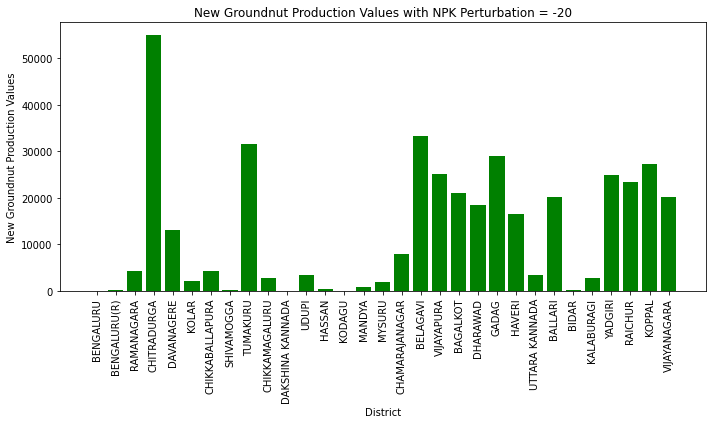

In [286]:
import matplotlib.pyplot as plt

def calculate_and_visualize(perturbation, crop, Working_Directory, what,plot):
    # Mapping of factor names based on 'what'
    factor_mapping = {
        'NPK': 'TotalNPK',
        'MSeeds': 'SowingSeedsDistributed_Maize',
        'Cattle': 'LivestockCensus_2012_Cattle', # Only for Maize
        'MArea': 'AreaUnderCereals_Maize',
        'PArea': 'AreaUnderCereals_Paddy',
        'Canal': 'NetAreaIrrigated_Canals_NetAreaIrrigated', # Canal is only for Rice
        'GArea' : 'AreaUnderOilSeeds_GroundNut',
        'Tractors': 'MotorVehicles_Tractors',
        'Sheep' : 'LivestockCensus_2012_Sheep',
        'Tubewells': 'NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea'
    }

    # Dynamically select the correct factor and slope column based on 'what'
    factor_name = factor_mapping[what]
    production_col = f'{crop}_Production'
    slope_col = f'Slope_{crop}_{what}'

    # Calculate the factor
    # if()
    # factor = Working_Directory[f'{crop}_Ratio'] * Working_Directory[factor_name]
    factor = Working_Directory[f'{crop}_{what}']
        
    # Initialize an empty list for new values
    New_values = []
    
    # Calculate new values based on the provided formula
    for i in range(len(Working_Directory['District'])):
        y_new = Working_Directory[production_col][i] + Working_Directory[slope_col][i] * (perturbation * factor[i] / 100)
        New_values.append(int(y_new))
    
    # Add the new values to the DataFrame with a specific column name
    Working_Directory[f'{crop[0].upper()} - {what} {perturbation}'] = New_values
    
    if(plot == True):
    # Visualization
        plt.figure(figsize=(10, 6))
        plt.bar(Working_Directory['District'], New_values, color='green')
        plt.xlabel('District')
        plt.ylabel(f'New {crop} Production Values')
        plt.title(f'New {crop} Production Values with {what} Perturbation = {perturbation}')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

# Example usage:
perturbation = -20
what = 'NPK'  # Factor to be used
crop = 'Groundnut'  # Or 'Maize'

# Assuming Working_Directory is a DataFrame that has all necessary columns defined
calculate_and_visualize(perturbation, crop, Working_Directory, what,True)


In [287]:
Working_Directory

,District,Rice_Production,Maize_Production,Groundnut_Production,TotalNPK,SowingSeedsDistributed_Maize,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,AreaUnderCereals_Paddy,NetAreaIrrigated_Canals_NetAreaIrrigated,...,Slope_Groundnut_MArea,Slope_Groundnut_PArea,Slope_Groundnut_Canal,Slope_Groundnut_GArea,Slope_Groundnut_Tractors,Slope_Groundnut_Sheep,Slope_Groundnut_Tubewells,R - NPK -20,M - NPK -20,G - NPK -20
0,BENGALURU,3376.0,2879,71.0,23310.0,4.450,136582.0,1129.0,782.0,0,...,0.156341,-0.088517,33.609567,0.674077,42.168010,0.890102,8.033928,1055,848,17
1,BENGALURU(R),2354.0,42583,206.0,19259.0,134.730,158820.0,14867.0,736.0,0,...,0.156341,-0.088517,33.609567,0.674077,42.168010,0.890102,8.033928,1595,28510,133
2,RAMANAGARA,12128.0,10450,4830.0,7472.0,260.150,259897.0,1987.0,4468.0,7895,...,0.156341,-0.088517,33.609567,0.674077,42.168010,0.890102,8.033928,10963,9419,4320
3,CHITRADURGA,4566.0,271975,68575.0,35884.0,5004.000,275889.0,92194.0,1297.0,1820,...,0.156341,-0.088517,33.609567,0.674077,42.168010,0.890102,8.033928,3739,221442,54934
4,DAVANAGERE,489505.0,593544,16592.0,99644.0,6124.600,332075.0,173400.0,98259.0,84789,...,0.156341,-0.088517,33.609567,0.674077,42.168010,0.890102,8.033928,393768,474412,13026
5,KOLAR,864.0,1759,5810.0,22190.0,51.500,229036.0,640.0,395.0,0,...,0.156341,-0.088517,33.609567,0.674077,42.168010,0.890102,8.033928,374,735,2191
6,CHIKKABALLAPURA,2698.0,105491,7132.0,28357.0,3538.150,246339.0,59377.0,1333.0,0,...,0.156341,-0.088517,33.609567,0.674077,42.168010,0.890102,8.033928,1751,67498,4382
7,SHIVAMOGGA,384974.0,226532,248.0,56609.0,3814.020,568476.0,43827.0,109617.0,42502,...,0.156341,-0.088517,33.609567,0.674077,42.168010,0.890102,8.033928,304934,178197,191
8,TUMAKURU,26042.0,66868,39626.0,38148.0,1639.850,527067.0,24207.0,10379.0,4099,...,0.156341,-0.088517,33.609567,0.674077,42.168010,0.890102,8.033928,21211,54138,31550
9,CHIKKAMAGALURU,110533.0,61353,3909.0,67863.0,2923.790,337576.0,25831.0,33036.0,6210,...,0.017500,-0.053064,18.019804,0.694871,48.952483,3.377213,9.748009,85398,30149,2702


posx and posy should be finite values
posx and posy should be finite values


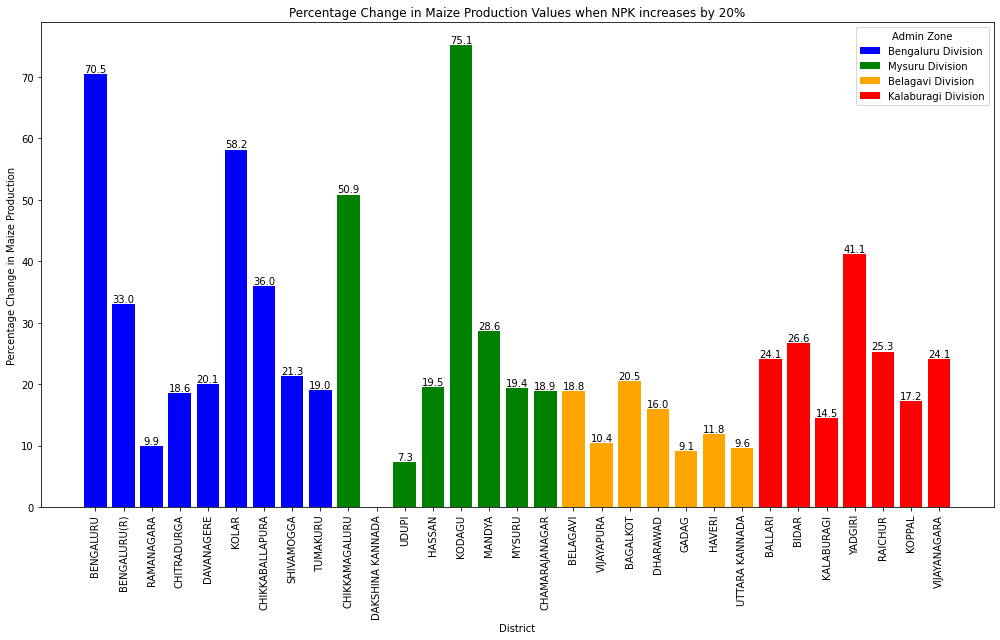

In [288]:
import matplotlib.pyplot as plt
import numpy as np

def calculate_and_visualize_2(perturbation, crop, Working_Directory, what):
    # Mapping of factor names based on 'what'
    factor_mapping = {
        'NPK': 'TotalNPK',
        'MSeeds': 'SowingSeedsDistributed_Maize',
        'Cattle': 'LivestockCensus_2012_Cattle',
        'MArea': 'AreaUnderCereals_Maize',
        'PArea': 'AreaUnderCereals_Paddy',
        'Canal': 'NetAreaIrrigated_Canals_NetAreaIrrigated',
        'GArea' : 'AreaUnderOilSeeds_GroundNut',
        'Tractors': 'MotorVehicles_Tractors',
        'Sheep' : 'LivestockCensus_2012_Sheep',
        'Tubewells': 'NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea'
    }
    
    # Mapping of colors based on 'Admin_Zone'
    zone_colors = {
        'Bengaluru Division': 'blue',
        'Mysuru Division': 'green',
        'Belagavi Division': 'orange',
        'Kalaburagi Division': 'red'
    }
    
    # Dynamically select the correct factor and slope column based on 'what'
    factor_name = factor_mapping[what]
    production_col = f'{crop}_Production'
    slope_col = f'Slope_{crop}_{what}'

    # Calculate the factor
    # factor = Working_Directory[f'{crop}_Ratio'] * Working_Directory[factor_name]
    factor = Working_Directory[f'{crop}_{what}']
    
    
    # Initialize an empty list for new values
    New_values = []
    
    # Calculate new values based on the provided formula
    for i in range(len(Working_Directory['District'])):
        y_new = Working_Directory[production_col][i] + Working_Directory[slope_col][i] * (perturbation * factor[i] / 100)
        New_values.append(int(y_new))
    
    # Add the new values to the DataFrame with a specific column name
    Working_Directory[f'{crop[0].upper()} - {what} {perturbation}'] = New_values
    Working_Directory['Change'] =  ((New_values - Working_Directory[production_col])/Working_Directory[production_col])*100
    
    # Visualization with color-coded zones
    plt.figure(figsize=(14, 9))
    for zone in Working_Directory['Admin_Zone'].unique():
        zone_districts = Working_Directory[Working_Directory['Admin_Zone'] == zone]
        bars = plt.bar(zone_districts['District'], 
                       zone_districts['Change'], 
                       color=zone_colors[zone], 
                       label=zone)
        
        # Add value labels to the bars
        for bar, value in zip(bars, zone_districts['Change']):
            plt.text(bar.get_x() + bar.get_width() / 2, 
                     bar.get_height(), 
                     f'{value:.1f}', 
                     ha='center', 
                     va='bottom', 
                     fontsize=10)
    
    plt.xlabel('District')
    plt.ylabel(f'Percentage Change in {crop} Production')
    plt.title(f'Percentage Change in {crop} Production Values when {what} increases by {perturbation}%')
    plt.xticks(rotation=90)
    plt.legend(title='Admin Zone')
    plt.tight_layout()
    plt.show()

# Example usage:
perturbation = 20
what = 'NPK'  # Factor to be used
crop = 'Maize'  # Or 'Maize'

# Assuming Working_Directory is a DataFrame that has all necessary columns defined
calculate_and_visualize_2(perturbation, crop, Working_Directory, what)


posx and posy should be finite values
posx and posy should be finite values


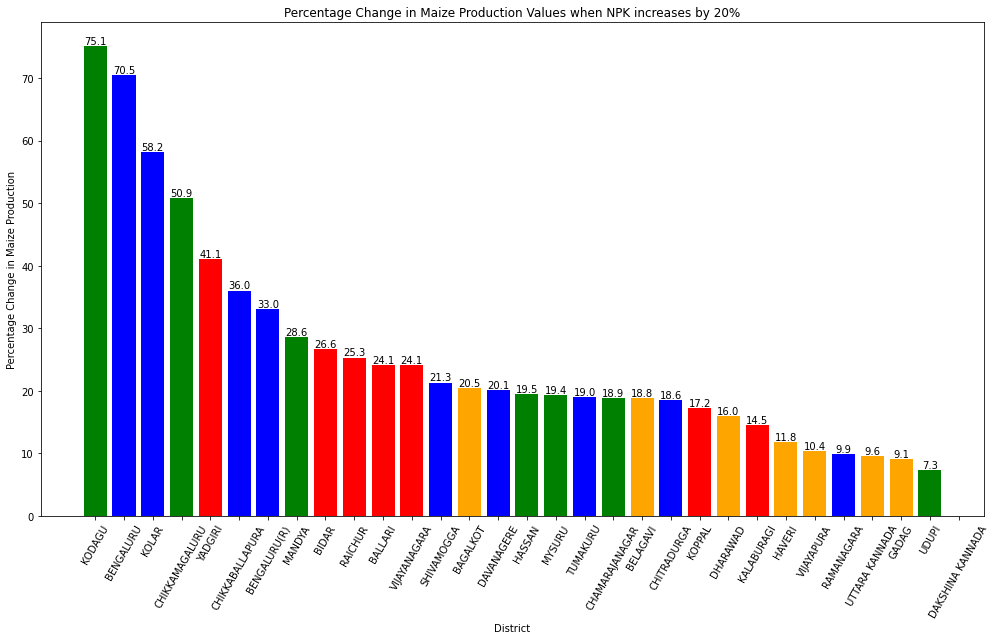

posx and posy should be finite values
posx and posy should be finite values


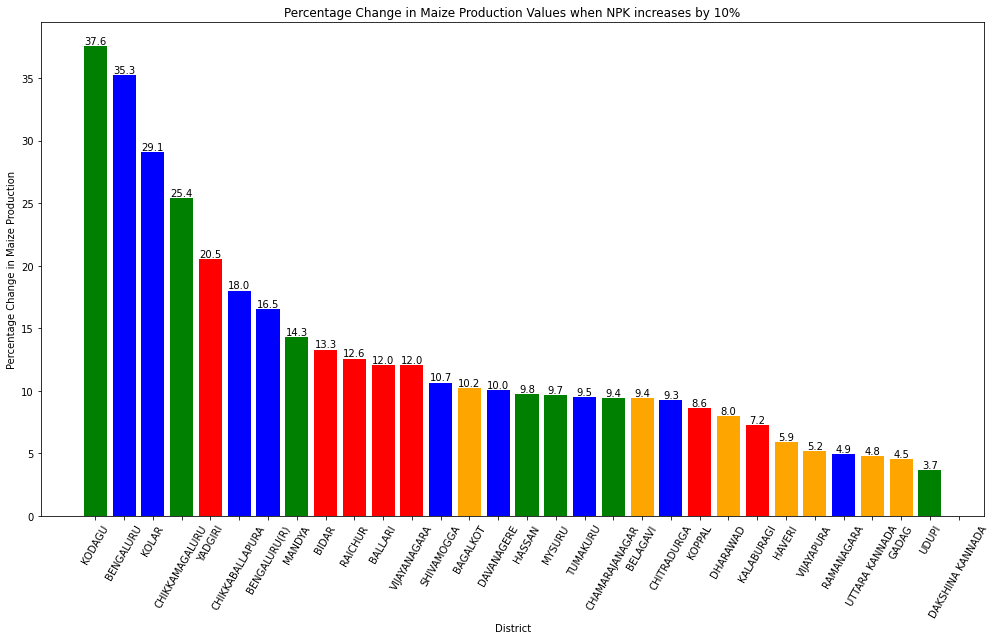

In [289]:
import matplotlib.pyplot as plt
import numpy as np

def calculate_and_visualize_2(perturbation, crop, Working_Directory, what):
    # Mapping of factor names based on 'what'
    factor_mapping = {
        'NPK': 'TotalNPK',
        'MSeeds': 'SowingSeedsDistributed_Maize',
        'Cattle': 'LivestockCensus_2012_Cattle',
        'MArea': 'AreaUnderCereals_Maize',
        'PArea': 'AreaUnderCereals_Paddy',
        'Canal': 'NetAreaIrrigated_Canals_NetAreaIrrigated',
        'GArea' : 'AreaUnderOilSeeds_GroundNut',
        'Tractors': 'MotorVehicles_Tractors',
        'Sheep' : 'LivestockCensus_2012_Sheep',
        'Tubewells': 'NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea'
    }
    
    # Mapping of colors based on 'Admin_Zone'
    zone_colors = {
        'Bengaluru Division': 'blue',
        'Mysuru Division': 'green',
        'Belagavi Division': 'orange',
        'Kalaburagi Division': 'red'
    }
    
    # Dynamically select the correct factor and slope column based on 'what'
    factor_name = factor_mapping[what]
    production_col = f'{crop}_Production'
    slope_col = f'Slope_{crop}_{what}'

    # Calculate the factor
    factor = Working_Directory[f'{crop}_{what}']
    
    # Initialize an empty list for new values
    New_values = []
    
    # Calculate new values based on the provided formula
    for i in range(len(Working_Directory['District'])):
        y_new = Working_Directory[production_col][i] + Working_Directory[slope_col][i] * (perturbation * factor[i] / 100)
        New_values.append(int(y_new))
    
    # Add the new values to the DataFrame with a specific column name
    Working_Directory[f'{crop[0].upper()} - {what} {perturbation}'] = New_values
    Working_Directory['Change'] =  ((New_values - Working_Directory[production_col]) / Working_Directory[production_col]) * 100
    
    # Sort the entire DataFrame by 'Change' in descending order
    Working_Directory = Working_Directory.sort_values('Change', ascending=False)

    # Visualization with color-coded zones
    plt.figure(figsize=(14, 9))
    
    # Plot the bars based on the sorted 'Change' values
    bars = plt.bar(Working_Directory['District'], 
                   Working_Directory['Change'], 
                   color=[zone_colors[zone] for zone in Working_Directory['Admin_Zone']])
    
    # Add value labels to the bars
    for bar, value in zip(bars, Working_Directory['Change']):
        plt.text(bar.get_x() + bar.get_width() / 2, 
                 bar.get_height(), 
                 f'{value:.1f}', 
                 ha='center', 
                 va='bottom', 
                 fontsize=10)
    
    plt.xlabel('District')
    plt.ylabel(f'Percentage Change in {crop} Production')
    plt.title(f'Percentage Change in {crop} Production Values when {what} increases by {perturbation}%')
    plt.xticks(rotation=60)
    plt.tight_layout()
    plt.show()

# Example usage:
perturbation = 20
what = 'NPK'  # Factor to be used
crop = 'Maize'  # Or 'Maize'

# Assuming Working_Directory is a DataFrame that has all necessary columns defined
calculate_and_visualize_2(perturbation, crop, Working_Directory, what)
calculate_and_visualize_2(10, crop, Working_Directory, what)


In [290]:
get = Working_Directory[['District','Maize_Production']]
get

,District,Maize_Production
0,BENGALURU,2879
1,BENGALURU(R),42583
2,RAMANAGARA,10450
3,CHITRADURGA,271975
4,DAVANAGERE,593544
5,KOLAR,1759
6,CHIKKABALLAPURA,105491
7,SHIVAMOGGA,226532
8,TUMAKURU,66868
9,CHIKKAMAGALURU,61353


posx and posy should be finite values
posx and posy should be finite values


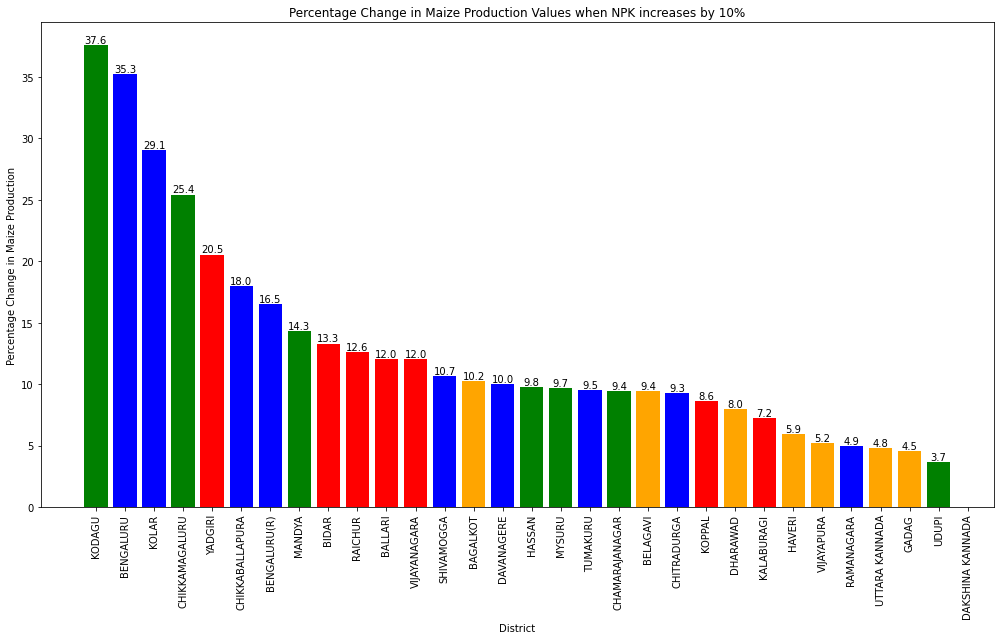

In [291]:
import matplotlib.pyplot as plt
import numpy as np

def calculate_and_visualize_2(perturbation, crop, Working_Directory, what):
    # Mapping of factor names based on 'what'
    factor_mapping = {
        'NPK': 'TotalNPK',
        'MSeeds': 'SowingSeedsDistributed_Maize',
        'Cattle': 'LivestockCensus_2012_Cattle',
        'MArea': 'AreaUnderCereals_Maize',
        'PArea': 'AreaUnderCereals_Paddy',
        'Canal': 'NetAreaIrrigated_Canals_NetAreaIrrigated',
        'GArea' : 'AreaUnderOilSeeds_GroundNut',
        'Tractors': 'MotorVehicles_Tractors',
        'Sheep' : 'LivestockCensus_2012_Sheep',
        'Tubewells': 'NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea'
    }
    
    # Mapping of colors based on 'Admin_Zone'
    zone_colors = {
        'Bengaluru Division': 'blue',
        'Mysuru Division': 'green',
        'Belagavi Division': 'orange',
        'Kalaburagi Division': 'red'
    }
    
    # Dynamically select the correct factor and slope column based on 'what'
    factor_name = factor_mapping[what]
    production_col = f'{crop}_Production'
    slope_col = f'Slope_{crop}_{what}'

    # Calculate the factor
    factor = Working_Directory[f'{crop}_{what}']
    
    # Initialize an empty list for new values
    New_values = []
    
    # Calculate new values based on the provided formula
    for i in range(len(Working_Directory['District'])):
        y_new = Working_Directory[production_col][i] + Working_Directory[slope_col][i] * (perturbation * factor[i] / 100)
        New_values.append(int(y_new))
    
    # Add the new values to the DataFrame with a specific column name
    Working_Directory[f'{crop[0].upper()} - {what} {perturbation}'] = New_values
    Working_Directory['Change'] =  ((New_values - Working_Directory[production_col]) / Working_Directory[production_col]) * 100
    
    # Sort the entire DataFrame by 'Change' in descending order
    Working_Directory = Working_Directory.sort_values('Change', ascending=False)

    # Visualization with color-coded zones
    plt.figure(figsize=(14, 9))
    
    # Plot the bars based on the sorted 'Change' values
    bars = plt.bar(Working_Directory['District'], 
                   Working_Directory['Change'], 
                   color=[zone_colors[zone] for zone in Working_Directory['Admin_Zone']])
    
    # Add value labels to the bars
    for bar, value in zip(bars, Working_Directory['Change']):
        plt.text(bar.get_x() + bar.get_width() / 2, 
                 bar.get_height(), 
                 f'{value:.1f}', 
                 ha='center', 
                 va='bottom', 
                 fontsize=10)
    
    plt.xlabel('District')
    plt.ylabel(f'Percentage Change in {crop} Production')
    plt.title(f'Percentage Change in {crop} Production Values when {what} increases by {perturbation}%')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Example usage:
perturbation = 10
what = 'NPK'  # Factor to be used
crop = 'Maize'  # Or 'Maize'

# Assuming Working_Directory is a DataFrame that has all necessary columns defined
calculate_and_visualize_2(perturbation, crop, Working_Directory, what)


posx and posy should be finite values
posx and posy should be finite values


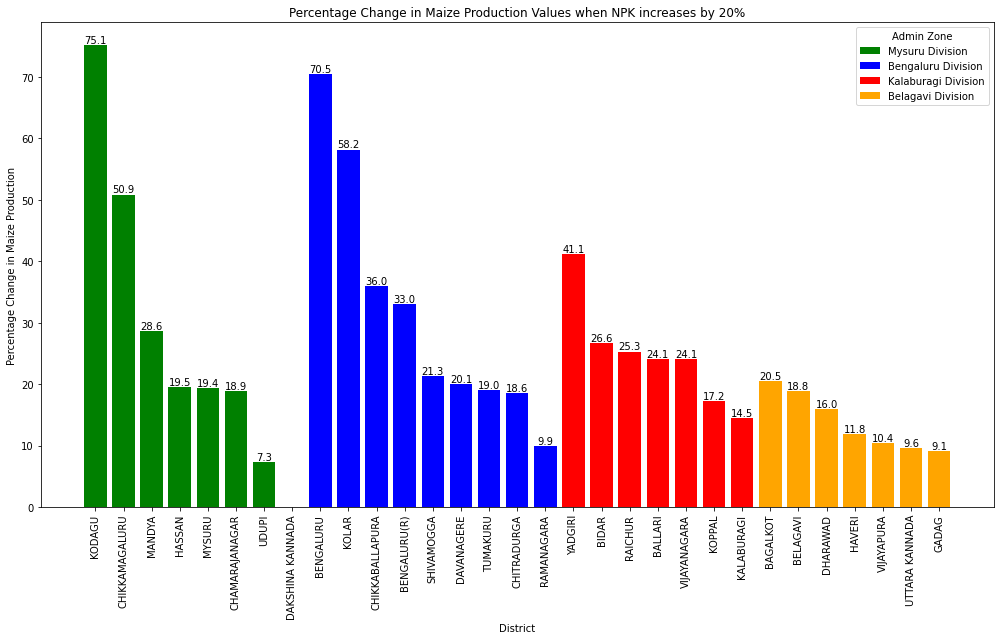

In [292]:
import matplotlib.pyplot as plt
import numpy as np

def calculate_and_visualize_2(perturbation, crop, Working_Directory, what):
    # Mapping of factor names based on 'what'
    factor_mapping = {
        'NPK': 'TotalNPK',
        'MSeeds': 'SowingSeedsDistributed_Maize',
        'Cattle': 'LivestockCensus_2012_Cattle',
        'MArea': 'AreaUnderCereals_Maize',
        'PArea': 'AreaUnderCereals_Paddy',
        'Canal': 'NetAreaIrrigated_Canals_NetAreaIrrigated',
        'GArea' : 'AreaUnderOilSeeds_GroundNut',
        'Tractors': 'MotorVehicles_Tractors',
        'Sheep' : 'LivestockCensus_2012_Sheep',
        'Tubewells': 'NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea'
    }
    
    # Mapping of colors based on 'Admin_Zone'
    zone_colors = {
        'Bengaluru Division': 'blue',
        'Mysuru Division': 'green',
        'Belagavi Division': 'orange',
        'Kalaburagi Division': 'red'
    }
    
    # Dynamically select the correct factor and slope column based on 'what'
    factor_name = factor_mapping[what]
    production_col = f'{crop}_Production'
    slope_col = f'Slope_{crop}_{what}'
    
    # Calculate the factor
    factor = Working_Directory[f'{crop}_{what}']
    
    # Initialize an empty list for new values
    New_values = []
    
    # Calculate new values based on the provided formula
    for i in range(len(Working_Directory['District'])):
        y_new = Working_Directory[production_col][i] + Working_Directory[slope_col][i] * (perturbation * factor[i] / 100)
        New_values.append(int(y_new))
    
    # Add the new values to the DataFrame with a specific column name
    Working_Directory[f'{crop[0].upper()} - {what} {perturbation}'] = New_values
    Working_Directory['Change'] =  ((New_values - Working_Directory[production_col]) / Working_Directory[production_col]) * 100
    
    # Sort the DataFrame by 'Change' in descending order
    Working_Directory = Working_Directory.sort_values('Change', ascending=False)

    # Visualization with color-coded zones
    plt.figure(figsize=(14, 9))
    
    # Loop through each zone and plot sorted data
    for zone in Working_Directory['Admin_Zone'].unique():
        zone_districts = Working_Directory[Working_Directory['Admin_Zone'] == zone]
        
        # Plot the bars in decreasing order of 'Change'
        bars = plt.bar(zone_districts['District'], 
                       zone_districts['Change'], 
                       color=zone_colors[zone], 
                       label=zone)
        
        # Add value labels to the bars
        for bar, value in zip(bars, zone_districts['Change']):
            plt.text(bar.get_x() + bar.get_width() / 2, 
                     bar.get_height(), 
                     f'{value:.1f}', 
                     ha='center', 
                     va='bottom', 
                     fontsize=10)
    
    plt.xlabel('District')
    plt.ylabel(f'Percentage Change in {crop} Production')
    plt.title(f'Percentage Change in {crop} Production Values when {what} increases by {perturbation}%')
    plt.xticks(rotation=90)
    plt.legend(title='Admin Zone')
    plt.tight_layout()
    plt.show()

# Example usage:
perturbation = 20
what = 'NPK'  # Factor to be used
crop = 'Maize'  # Or 'Maize'

# Assuming Working_Directory is a DataFrame that has all necessary columns defined
calculate_and_visualize_2(perturbation, crop, Working_Directory, what)


Plot saved as Maize_production_change.jpg


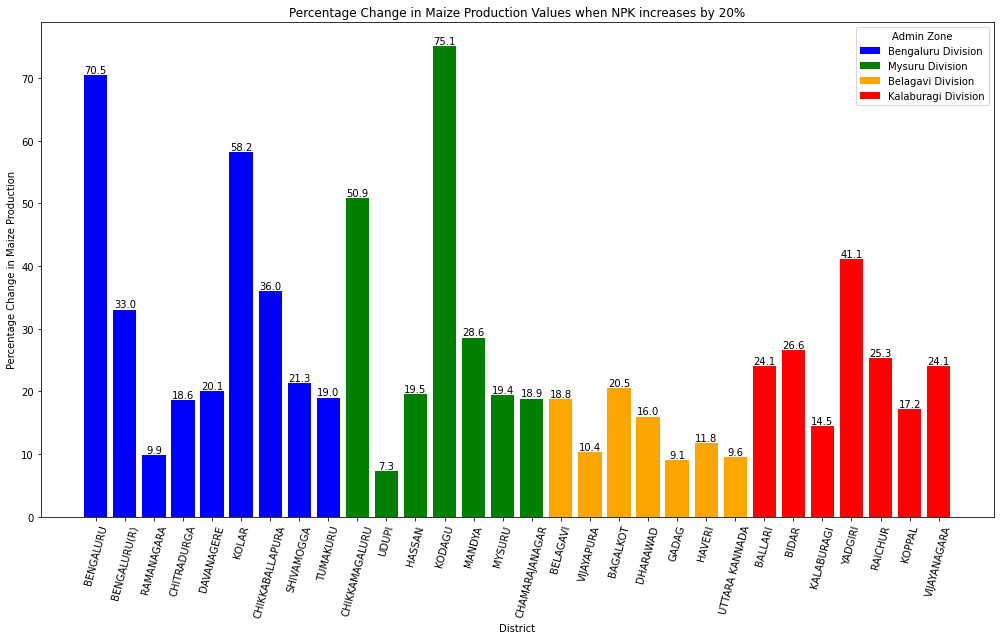

In [293]:
import matplotlib.pyplot as plt
import numpy as np

def calculate_and_visualize_2(perturbation, crop, Working_Directory, what, save_as_image=False, image_name="plot.jpg"):
    # Mapping of factor names based on 'what'
    factor_mapping = {
        'NPK': 'TotalNPK',
        'MSeeds': 'SowingSeedsDistributed_Maize',
        'Cattle': 'LivestockCensus_2012_Cattle',
        'MArea': 'AreaUnderCereals_Maize',
        'PArea': 'AreaUnderCereals_Paddy',
        'Canal': 'NetAreaIrrigated_Canals_NetAreaIrrigated',
        'GArea' : 'AreaUnderOilSeeds_GroundNut',
        'Tractors': 'MotorVehicles_Tractors',
        'Sheep' : 'LivestockCensus_2012_Sheep',
        'Tubewells': 'NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea'
    }
    
    # Mapping of colors based on 'Admin_Zone'
    zone_colors = {
        'Bengaluru Division': 'blue',
        'Mysuru Division': 'green',
        'Belagavi Division': 'orange',
        'Kalaburagi Division': 'red'
    }
    
    # Dynamically select the correct factor and slope column based on 'what'
    factor_name = factor_mapping[what]
    production_col = f'{crop}_Production'
    slope_col = f'Slope_{crop}_{what}'

    # Filter out rows where the original production is 0
    filtered_df = Working_Directory[Working_Directory[production_col] != 0].copy()
    
    # Calculate the factor
    factor = filtered_df[f'{crop}_{what}']
    
    # Initialize an empty list for new values
    New_values = []
    
    # Calculate new values based on the provided formula
    for i in range(len(filtered_df['District'])):
        y_new = filtered_df[production_col].iloc[i] + filtered_df[slope_col].iloc[i] * (perturbation * factor.iloc[i] / 100)
        New_values.append(int(y_new))
    
    # Add the new values to the filtered DataFrame
    filtered_df[f'{crop[0].upper()} - {what} {perturbation}'] = New_values
    filtered_df['Change'] =  ((New_values - filtered_df[production_col]) / filtered_df[production_col]) * 100
    
    # filtered_df = filtered_df.sort_values('Change', ascending=False)
    
    # Visualization with color-coded zones
    plt.figure(figsize=(14, 9))
    for zone in filtered_df['Admin_Zone'].unique():
        zone_districts = filtered_df[filtered_df['Admin_Zone'] == zone]
        bars = plt.bar(zone_districts['District'], 
                       zone_districts['Change'], 
                       color=zone_colors[zone], 
                       label=zone)
        
        # Add value labels to the bars
        for bar, value in zip(bars, zone_districts['Change']):
            plt.text(bar.get_x() + bar.get_width() / 2, 
                     bar.get_height(), 
                     f'{value:.1f}', 
                     ha='center', 
                     va='bottom', 
                     fontsize=10)
    
    plt.xlabel('District')
    plt.ylabel(f'Percentage Change in {crop} Production')
    plt.title(f'Percentage Change in {crop} Production Values when {what} increases by {perturbation}%')
    plt.xticks(rotation=75)
    plt.legend(title='Admin Zone')
    plt.tight_layout()
    
    # Save the plot as a jpg if save_as_image is True
    if save_as_image:
        plt.savefig(image_name, format='jpg', dpi=300)
        print(f"Plot saved as {image_name}")
    
    # Show the plot
    plt.show()

# Example usage:
perturbation = 20
what = 'NPK'  # Factor to be used
crop = 'Maize'  # Or 'Maize'

# Assuming Working_Directory is a DataFrame that has all necessary columns defined
calculate_and_visualize_2(perturbation, crop, Working_Directory, what, save_as_image=True, image_name="Maize_production_change.jpg")


ReadME 1 Complete

ReadME 2 Start

1. We calculate stress and stability from results obtained in predictive analysis.
2. L2 Norm and Bonacich Centralities are used to calculate the stress and stability values.
3. Adjacency matrix is pre loaded.


1D Modeling

In [294]:
import pandas as pd
import numpy as np

adjacency_excel = pd.read_excel('Karnataka_District_Adjacency_File.xlsx')

district_codes = sorted(set(adjacency_excel['District_Code']))

n = len(district_codes)
adj_matrix = np.zeros((n, n), dtype=int)

code_to_index = {code: idx for idx, code in enumerate(district_codes)}

for i in range(len(adjacency_excel)):
    district_code = adjacency_excel['District_Code'][i]
    neighbors = [int(num) for num in str(adjacency_excel['District_Neighbors'][i]).split(',') if num.strip().isdigit()]
    
    for neighbor in neighbors:
        adj_matrix[code_to_index[district_code]][code_to_index[neighbor]] = 1
        adj_matrix[code_to_index[neighbor]][code_to_index[district_code]] = 1  # Assuming adjacency is bidirectional

adj_matrix_df = pd.DataFrame(adj_matrix, index=district_codes, columns=district_codes)

print(adj_matrix_df)

adj_matrix_np = adj_matrix_df.to_numpy()

    1   2   3   4   5   6   7   8   9   10  ...  22  23  24  25  26  27  28  \
1    0   1   1   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
2    1   0   1   0   0   1   1   0   1   0  ...   0   0   0   0   0   0   0   
3    1   1   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
4    0   0   0   0   1   0   0   0   1   1  ...   0   0   0   1   0   0   0   
5    0   0   0   1   0   0   0   1   0   1  ...   0   1   0   1   0   0   0   
6    0   1   0   0   0   0   1   0   0   0  ...   0   0   0   0   0   0   0   
7    0   1   0   0   0   1   0   0   1   0  ...   0   0   0   0   0   0   0   
8    0   0   0   0   1   0   0   0   0   1  ...   0   1   1   0   0   0   0   
9    0   1   1   1   0   0   1   0   0   1  ...   0   0   0   0   0   0   0   
10   0   0   0   1   1   0   0   1   1   0  ...   0   0   0   0   0   0   0   
11   0   0   0   0   0   0   0   0   0   1  ...   0   0   0   0   0   0   0   
12   0   0   0   0   0   0   0   1   0   1  ...   0 

In [295]:
# Other_Directory = pd.read_csv('Regression_Results.csv')
# Other_Directory.drop(Other_Directory.columns[[0]], axis=1, inplace=True)
# Other_Directory

In [296]:
def normalize_list(lst):
    min_val = min(lst)
    max_val = max(lst)
    normalized_lst = [(x - min_val) / (max_val - min_val) for x in lst]
    return normalized_lst

In [297]:
Working_Directory

,District,Rice_Production,Maize_Production,Groundnut_Production,TotalNPK,SowingSeedsDistributed_Maize,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,AreaUnderCereals_Paddy,NetAreaIrrigated_Canals_NetAreaIrrigated,...,Slope_Groundnut_GArea,Slope_Groundnut_Tractors,Slope_Groundnut_Sheep,Slope_Groundnut_Tubewells,R - NPK -20,M - NPK -20,G - NPK -20,M - NPK 20,Change,M - NPK 10
0,BENGALURU,3376.0,2879,71.0,23310.0,4.450,136582.0,1129.0,782.0,0,...,0.674077,42.168010,0.890102,8.033928,1055,848,17,4909,70.510594,3894
1,BENGALURU(R),2354.0,42583,206.0,19259.0,134.730,158820.0,14867.0,736.0,0,...,0.674077,42.168010,0.890102,8.033928,1595,28510,133,56655,33.046051,49619
2,RAMANAGARA,12128.0,10450,4830.0,7472.0,260.150,259897.0,1987.0,4468.0,7895,...,0.674077,42.168010,0.890102,8.033928,10963,9419,4320,11480,9.856459,10965
3,CHITRADURGA,4566.0,271975,68575.0,35884.0,5004.000,275889.0,92194.0,1297.0,1820,...,0.674077,42.168010,0.890102,8.033928,3739,221442,54934,322507,18.579649,297241
4,DAVANAGERE,489505.0,593544,16592.0,99644.0,6124.600,332075.0,173400.0,98259.0,84789,...,0.674077,42.168010,0.890102,8.033928,393768,474412,13026,712675,20.071132,653109
5,KOLAR,864.0,1759,5810.0,22190.0,51.500,229036.0,640.0,395.0,0,...,0.674077,42.168010,0.890102,8.033928,374,735,2191,2782,58.158044,2270
6,CHIKKABALLAPURA,2698.0,105491,7132.0,28357.0,3538.150,246339.0,59377.0,1333.0,0,...,0.674077,42.168010,0.890102,8.033928,1751,67498,4382,143483,36.014447,124487
7,SHIVAMOGGA,384974.0,226532,248.0,56609.0,3814.020,568476.0,43827.0,109617.0,42502,...,0.674077,42.168010,0.890102,8.033928,304934,178197,191,274866,21.336500,250699
8,TUMAKURU,26042.0,66868,39626.0,38148.0,1639.850,527067.0,24207.0,10379.0,4099,...,0.674077,42.168010,0.890102,8.033928,21211,54138,31550,79597,19.036011,73232
9,CHIKKAMAGALURU,110533.0,61353,3909.0,67863.0,2923.790,337576.0,25831.0,33036.0,6210,...,0.694871,48.952483,3.377213,9.748009,85398,30149,2702,92556,50.858149,76954


In [298]:
# Which perturbation we want stress and stability for
Name = 'M - NPK -20'
Capability_list = normalize_list(Working_Directory[f'{Name}'])
# Capability_list

In [299]:
import numpy as np

def calculate_avg_capability(capability, neighbors):
    num_neighbors = len(neighbors)
    if num_neighbors == 0:
        return 0
    sum_capabilities = sum(capability[n] for n in neighbors)
    return sum_capabilities / num_neighbors

def calculate_stress_stability(capability, adjacency_matrix):
    n = len(capability)
    stress = np.zeros(n)
    stability = np.zeros(n)
    
    for i in range(n):
        neighbors = [j for j in range(n) if adjacency_matrix[i][j] == 1 and i != j]
        if len(neighbors) > 0:
            avg_capability = calculate_avg_capability(capability, neighbors)
            stress[i] = abs(avg_capability - capability[i])
            stability[i] = 1 - stress[i]
        else:
            stress[i] = 0  # If no neighbors, stress is zero
            stability[i] = 1
        
    return stress, stability

Name = 'M - NPK -20'

Capability_list = normalize_list(Working_Directory[f'{Name}'])
stress, stability = calculate_stress_stability(Capability_list, adj_matrix_np)

print("Stress values:", stress)
print("Stability values:", stability)

Stress values: [3.81872718e-02 4.17864641e-03 7.17696854e-02 1.64649714e-01
 6.65423725e-01 9.96370244e-02 8.36902664e-02 3.33043852e-05
 7.84866319e-02 2.96907390e-01 1.59911638e-01 1.21058805e-01
 4.91598723e-01 2.57130933e-01 2.08116995e-01 1.85935432e-02
 1.58894941e-01 7.22599766e-01 1.39783564e-01 1.92296991e-02
 3.56199885e-01 1.63548621e-01 4.57099375e-01 4.12436869e-01
 2.62131710e-01 2.20378068e-02 1.18750509e-01 1.48406870e-01
 2.69096060e-01 1.27621561e-01 3.33376193e-01]
Stability values: [0.96181273 0.99582135 0.92823031 0.83535029 0.33457628 0.90036298
 0.91630973 0.9999667  0.92151337 0.70309261 0.84008836 0.87894119
 0.50840128 0.74286907 0.791883   0.98140646 0.84110506 0.27740023
 0.86021644 0.9807703  0.64380011 0.83645138 0.54290063 0.58756313
 0.73786829 0.97796219 0.88124949 0.85159313 0.73090394 0.87237844
 0.66662381]


In [300]:
# Combined calculation function
def calculate_metrics(Working_Directory, crop, perturbation, what):
    # Normalize the capability list
    capability_name = f'{crop[0].upper()} - {what} {perturbation}'
    Capability_list = normalize_list(Working_Directory[capability_name])
    
    def calculate_avg_capability(capability, neighbors):
        num_neighbors = len(neighbors)
        if num_neighbors == 0:
            return 0
        return sum(capability[n] for n in neighbors) / num_neighbors

    def calculate_stress_stability(capability, adjacency_matrix):
        n = len(capability)
        stress = np.zeros(n)
        stability = np.zeros(n)
        for i in range(n):
            neighbors = [j for j in range(n) if adjacency_matrix[i][j] == 1 and i != j]
            if len(neighbors) > 0:
                avg_capability = calculate_avg_capability(capability, neighbors)
                stress[i] = abs(avg_capability - capability[i])
                stability[i] = 1 - stress[i]
            else:
                stress[i] = 0
                stability[i] = 1
        return stress, stability

    # Calculate stress and stability
    stress, stability = calculate_stress_stability(Capability_list, adj_matrix_np)
    
    # Calculate the impact as percentage change
    original_production = Working_Directory[f'{crop}_Production']
    new_production = Working_Directory[capability_name]
    impact = ((new_production - original_production) / original_production) * 100

    # Column names
    stability_column_name = f'Stability_{crop[0].upper()}_{what}_{perturbation}'
    stress_column_name = f'Stress_{crop[0].upper()}_{what}_{perturbation}'
    impact_column_name = f'Impact_{crop[0].upper()}_{what}_{perturbation}'

    return stability, stress, impact, stability_column_name, stress_column_name, impact_column_name


In [301]:
# Impact calculation function
def calculate_impact(Working_Directory, crop, perturbation, what):
    # Normalize the capability list
    capability_name = f'{crop[0].upper()} - {what} {perturbation}'

    # Calculate the impact as percentage change
    original_production = Working_Directory[f'{crop}_Production']
    new_production = Working_Directory[capability_name]
    impact = ((new_production - original_production) / original_production) * 100

    # Column names
    impact_column_name = f'Impact_{crop[0].upper()}_{what}_{perturbation}'

    return impact, impact_column_name


Code for generating the Data for Differential Impact Analysis

In [302]:
# Combined calculation function
def calculate_Change_Impact(Working_Directory, crop, perturbation, what):
    # Normalize the capability list
    calculate_and_visualize(perturbation, crop, Working_Directory, what,False)
    capability_name = f'{crop[0].upper()} - {what} {perturbation}'
    
    # Calculate the impact as percentage change
    original_production = Working_Directory[f'{crop}_Production']
    new_production = Working_Directory[capability_name]
    change = (new_production - original_production) 
    impact = ((new_production - original_production) / original_production) * 100

    return change,impact,new_production


For Maize Differential Impact

In [303]:
# Perturbations and factor mapping
crop = 'Maize'
perturbations = [10, -10, 20, -20]
factor_mapping = {
    'NPK': 'TotalNPK',
    'MSeeds': 'SowingSeedsDistributed_Maize',
    'Cattle': 'LivestockCensus_2012_Cattle',
    'MArea': 'AreaUnderCereals_Maize',
    'Tubewells': 'NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea'
}

# Initialize an empty DataFrame to store the results
Maize_Diff_Impact = pd.DataFrame()

# Loop over each perturbation and factor
for perturbation in perturbations:
    for factor, mapped_factor in factor_mapping.items():
        # Call the function
        Change, impact, New_Production = calculate_Change_Impact(Working_Directory, crop, perturbation, factor)
        District = Working_Directory['District']
        KDG_District = Working_Directory['KDG_District']
        Orig = Working_Directory[f'{crop}_Production']
        
        # Create a DataFrame with the results
        temp_df = pd.DataFrame({
            'District' : District,
            'KDG_District' : KDG_District,
            'Original Maize Production Value' : Orig,
            'Perturbation': perturbation,
            'Factor': mapped_factor,
            'New Maize Production Values': New_Production,
            'Percentage Change': impact,
            'Change': Change
        })
        
        # Append the results to the final DataFrame
        Maize_Diff_Impact = pd.concat([Maize_Diff_Impact, temp_df], ignore_index=True)

# Display or save the final DataFrame
Maize_Diff_Impact.to_csv('DIA\Maize_Diff_Impact.csv',index=False)
Maize_Diff_Impact

,District,KDG_District,Original Maize Production Value,Perturbation,Factor,New Maize Production Values,Percentage Change,Change
0,BENGALURU,Bengaluru Urban,2879,10,TotalNPK,3894,35.255297,1015
1,BENGALURU(R),Bengaluru Rural,42583,10,TotalNPK,49619,16.523026,7036
2,RAMANAGARA,Ramanagara,10450,10,TotalNPK,10965,4.928230,515
3,CHITRADURGA,Chitradurga,271975,10,TotalNPK,297241,9.289824,25266
4,DAVANAGERE,Davanagere,593544,10,TotalNPK,653109,10.035482,59565
...,...,...,...,...,...,...,...,...
615,KALABURAGI,Kalaburagi,14621,-20,NetAreaIrrigatedUnderDifferentSources_TubeWell...,13035,-10.847411,-1586
616,YADGIRI,Yadgir,2673,-20,NetAreaIrrigatedUnderDifferentSources_TubeWell...,2453,-8.230453,-220
617,RAICHUR,Raichur,723,-20,NetAreaIrrigatedUnderDifferentSources_TubeWell...,688,-4.840941,-35
618,KOPPAL,Koppal,190252,-20,NetAreaIrrigatedUnderDifferentSources_TubeWell...,159759,-16.027690,-30493


For Rice Differential Impact

In [304]:
# Perturbations and factor mapping
crop = 'Rice'
perturbations = [10, -10, 20, -20]
factor_mapping = {
    'NPK': 'TotalNPK',
    'PArea': 'AreaUnderCereals_Paddy',
    'Canal': 'NetAreaIrrigated_Canals_NetAreaIrrigated'
}

# Initialize an empty DataFrame to store the results
Rice_Diff_Impact = pd.DataFrame()

# Loop over each perturbation and factor
for perturbation in perturbations:
    for factor, mapped_factor in factor_mapping.items():
        # Call the function
        Change, impact, New_Production = calculate_Change_Impact(Working_Directory, crop, perturbation, factor)
        District = Working_Directory['District']
        KDG_District = Working_Directory['KDG_District']
        Orig = Working_Directory[f'{crop}_Production']
        
        # Create a DataFrame with the results
        temp_df = pd.DataFrame({
            'District' : District,
            'KDG_District' : KDG_District,
            'Original Rice Production Value' : Orig,
            'Perturbation': perturbation,
            'Factor': mapped_factor,
            'New Rice Production Values': New_Production,
            'Percentage Change': impact,
            'Change': Change
        })
        
        # Append the results to the final DataFrame
        Rice_Diff_Impact = pd.concat([Rice_Diff_Impact, temp_df], ignore_index=True)

# Display or save the final DataFrame
Rice_Diff_Impact.to_csv('DIA\Rice_Diff_Impact.csv',index=False)
Rice_Diff_Impact

,District,KDG_District,Original Rice Production Value,Perturbation,Factor,New Rice Production Values,Percentage Change,Change
0,BENGALURU,Bengaluru Urban,3376.0,10,TotalNPK,4536,34.360190,1160.0
1,BENGALURU(R),Bengaluru Rural,2354.0,10,TotalNPK,2733,16.100255,379.0
2,RAMANAGARA,Ramanagara,12128.0,10,TotalNPK,12710,4.798813,582.0
3,CHITRADURGA,Chitradurga,4566.0,10,TotalNPK,4979,9.045116,413.0
4,DAVANAGERE,Davanagere,489505.0,10,TotalNPK,537373,9.778858,47868.0
...,...,...,...,...,...,...,...,...
367,KALABURAGI,Kalaburagi,7888.0,-20,NetAreaIrrigated_Canals_NetAreaIrrigated,7610,-3.524341,-278.0
368,YADGIRI,Yadgir,224659.0,-20,NetAreaIrrigated_Canals_NetAreaIrrigated,166798,-25.755033,-57861.0
369,RAICHUR,Raichur,492342.0,-20,NetAreaIrrigated_Canals_NetAreaIrrigated,417685,-15.163646,-74657.0
370,KOPPAL,Koppal,243505.0,-20,NetAreaIrrigated_Canals_NetAreaIrrigated,229981,-5.553890,-13524.0


For Groundnut

In [305]:
# Perturbations and factor mapping
crop = 'Groundnut'
perturbations = [10, -10, 20, -20]

factor_mapping = {
    'NPK': 'TotalNPK',
    'GArea': 'AreaUnderOilSeeds_GroundNut',
    'Tractors': 'MotorVehicles_Tractors',
    'Sheep': 'LivestockCensus_2012_Sheep' 
}

# Initialize an empty DataFrame to store the results
Groundnut_Diff_Impact = pd.DataFrame()

# Loop over each perturbation and factor
for perturbation in perturbations:
    for factor, mapped_factor in factor_mapping.items():
        # Call the function
        Change, impact, New_Production = calculate_Change_Impact(Working_Directory, crop, perturbation, factor)
        District = Working_Directory['District']
        KDG_District = Working_Directory['KDG_District']
        Orig = Working_Directory[f'{crop}_Production']
        
        # Create a DataFrame with the results
        temp_df = pd.DataFrame({
            'District' : District,
            'KDG_District': KDG_District,
            'Original Maize Production Value' : Orig,
            'Perturbation': perturbation,
            'Factor': mapped_factor,
            'New Maize Production Values': New_Production,
            'Percentage Change': impact,
            'Change': Change
        })
        
        # Append the results to the final DataFrame
        Groundnut_Diff_Impact = pd.concat([Groundnut_Diff_Impact, temp_df], ignore_index=True)

# Display or save the final DataFrame
Groundnut_Diff_Impact.to_csv('DIA\Groundnut_Diff_Impact.csv',index=False)
Groundnut_Diff_Impact

,District,KDG_District,Original Maize Production Value,Perturbation,Factor,New Maize Production Values,Percentage Change,Change
0,BENGALURU,Bengaluru Urban,71.0,10,TotalNPK,97,36.619718,26.0
1,BENGALURU(R),Bengaluru Rural,206.0,10,TotalNPK,242,17.475728,36.0
2,RAMANAGARA,Ramanagara,4830.0,10,TotalNPK,5084,5.258799,254.0
3,CHITRADURGA,Chitradurga,68575.0,10,TotalNPK,75395,9.945315,6820.0
4,DAVANAGERE,Davanagere,16592.0,10,TotalNPK,18374,10.740116,1782.0
...,...,...,...,...,...,...,...,...
491,KALABURAGI,Kalaburagi,3114.0,-20,LivestockCensus_2012_Sheep,3055,-1.894669,-59.0
492,YADGIRI,Yadgir,31435.0,-20,LivestockCensus_2012_Sheep,26822,-14.674726,-4613.0
493,RAICHUR,Raichur,26958.0,-20,LivestockCensus_2012_Sheep,24298,-9.867201,-2660.0
494,KOPPAL,Koppal,29982.0,-20,LivestockCensus_2012_Sheep,27277,-9.022080,-2705.0


In [306]:
Working_Directory[:5]

,District,Rice_Production,Maize_Production,Groundnut_Production,TotalNPK,SowingSeedsDistributed_Maize,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,AreaUnderCereals_Paddy,NetAreaIrrigated_Canals_NetAreaIrrigated,...,G - GArea -10,G - Tractors -10,G - Sheep -10,G - NPK 20,G - GArea 20,G - Tractors 20,G - Sheep 20,G - GArea -20,G - Tractors -20,G - Sheep -20
0,BENGALURU,3376.0,2879,71.0,23310.0,4.45,136582.0,1129.0,782.0,0,...,66,42,67,124,80,128,77,61,13,64
1,BENGALURU(R),2354.0,42583,206.0,19259.0,134.73,158820.0,14867.0,736.0,0,...,194,202,197,278,229,212,222,182,199,189
2,RAMANAGARA,12128.0,10450,4830.0,7472.0,260.15,259897.0,1987.0,4468.0,7895,...,4607,4168,4642,5339,5275,6152,5204,4384,3507,4455
3,CHITRADURGA,4566.0,271975,68575.0,35884.0,5004.00,275889.0,92194.0,1297.0,1820,...,62055,62570,62165,82215,81613,80583,81394,55536,56566,55755
4,DAVANAGERE,489505.0,593544,16592.0,99644.0,6124.60,332075.0,173400.0,98259.0,84789,...,15562,15608,16371,20157,18651,18558,17032,14532,14625,16151


Visualization

In [307]:
import plotly.express as px

# Visualization function
def Calculate_and_visualize_1D(Working_Directory, crop, perturbation, what):
    calculate_and_visualize(perturbation, crop, Working_Directory, what, False)
    stability, stress, impact, stability_column_name, stress_column_name, impact_column_name = calculate_metrics(Working_Directory, crop, perturbation, what)
    
    # Add metrics to Working_Directory DataFrame
    Working_Directory[stability_column_name] = stability
    Working_Directory[stress_column_name] = stress
    Working_Directory[impact_column_name] = impact
    
    # Prepare data for Plotly
    for_plots = Working_Directory[[stability_column_name, impact_column_name, 'Abbreviation']].copy()
    for_plots.rename(columns={stability_column_name: 'stability', impact_column_name: 'Impact'}, inplace=True)

    # Create scatter plot with Plotly
    fig_increase = px.scatter(
        for_plots,
        x='stability',
        y='Impact',
        title=f'Impact vs Stability ({crop} +{perturbation}% {what})',
        labels={'stability': 'Stability', 'Impact': 'Impact'},
        text='Abbreviation',
        size_max=8,
        width=800,
        height=500
    )

    # Update hover labels
    fig_increase.update_traces(
        hoverlabel=dict(bgcolor='grey', font=dict(color='white')),
        textposition='top center'
    )

    # Calculate and add average lines
    avg_x_increase = for_plots['stability'].mean()
    avg_y_increase = for_plots['Impact'].mean()

    fig_increase.add_shape(
        type='line',
        x0=min(for_plots['stability']),
        x1=max(for_plots['stability']),
        y0=avg_y_increase,
        y1=avg_y_increase,
        line=dict(color='blue', width=2, dash='dash')
    )
    fig_increase.add_shape(
        type='line',
        x0=avg_x_increase,
        x1=avg_x_increase,
        y0=min(for_plots['Impact']),
        y1=max(for_plots['Impact']),
        line=dict(color='red', width=2, dash='dash')
    )

    # Add annotations for average lines
    fig_increase.add_annotation(
        x=avg_x_increase,
        y=max(for_plots['Impact']),
        text='Avg Stability',
        showarrow=False,
        font=dict(color='red')
    )
    fig_increase.add_annotation(
        x=max(for_plots['stability']),
        y=avg_y_increase,
        text='Avg Impact',
        showarrow=False,
        font=dict(color='blue')
    )

    # Add tooltips
    fig_increase.update_traces(
        hoverinfo='text+name',
        hovertext=["Impact: " + str(y) +
                   f"<br>Stability: {x}"
                   for x, y in zip(for_plots['stability'], for_plots['Impact'])]
    )

    # Show the plot
    fig_increase.show()

# Example usage
crop = 'Rice'
perturbation = 20
what = 'NPK'
Calculate_and_visualize_1D(Working_Directory, crop, perturbation, what)


1D Differential Impact

Maize

In [308]:
# Perturbations and factor mapping
crop = 'Maize'
perturbations = [10, -10, 20, -20]
factor_mapping = {
    'NPK': 'TotalNPK',
    'MSeeds': 'SowingSeedsDistributed_Maize',
    'Cattle': 'LivestockCensus_2012_Cattle',
    'MArea': 'AreaUnderCereals_Maize',
    'Tubewells': 'NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea'
}

# Initialize an empty DataFrame to store the results
Maize_1D_Diff_Impact = pd.DataFrame()

Name = 'Maize_Production'

Capability_list = normalize_list(Working_Directory[f'{Name}'])
init_stress, init_stability = calculate_stress_stability(Capability_list, adj_matrix_np)

# Loop over each perturbation and factor
for perturbation in perturbations:
    for factor, mapped_factor in factor_mapping.items():
        # Call the function
        Change, impact, New_Production = calculate_Change_Impact(Working_Directory, crop, perturbation, factor)
        stability, stress, impact, stability_column_name, stress_column_name, impact_column_name = calculate_metrics(Working_Directory, crop, perturbation, factor)
        
        District = Working_Directory['District']
        KDG_District = Working_Directory['KDG_District']
        Orig = Working_Directory[f'{crop}_Production']
        
        temp_df = pd.DataFrame({
            'District' : District,
            'KDG_District' : KDG_District,
            'Original Maize Production Value' : Orig,
            'Perturbation': perturbation,
            'Factor': mapped_factor,
            'New Maize Production Values': New_Production,
            'Percentage Change': impact,
            'Change': Change,
            'Initial Stress': init_stress,
            'Initial Stability': init_stability,
            'Stress': stress,
            'Stability': stability
        })
        
        # Append the results to the final DataFrame
        Maize_1D_Diff_Impact = pd.concat([Maize_1D_Diff_Impact, temp_df], ignore_index=True)

# Display or save the final DataFrame
Maize_1D_Diff_Impact.to_csv('1D\Maize_1D_Diff_Impact.csv',index=False)
Maize_1D_Diff_Impact

,District,KDG_District,Original Maize Production Value,Perturbation,Factor,New Maize Production Values,Percentage Change,Change,Initial Stress,Initial Stability,Stress,Stability
0,BENGALURU,Bengaluru Urban,2879,10,TotalNPK,3894,35.255297,1015,0.039824,0.960176,0.040419,0.959581
1,BENGALURU(R),Bengaluru Rural,42583,10,TotalNPK,49619,16.523026,7036,0.008582,0.991418,0.010181,0.989819
2,RAMANAGARA,Ramanagara,10450,10,TotalNPK,10965,4.928230,515,0.076609,0.923391,0.078366,0.921634
3,CHITRADURGA,Chitradurga,271975,10,TotalNPK,297241,9.289824,25266,0.144899,0.855101,0.137726,0.862274
4,DAVANAGERE,Davanagere,593544,10,TotalNPK,653109,10.035482,59565,0.668253,0.331747,0.669282,0.330718
...,...,...,...,...,...,...,...,...,...,...,...,...
615,KALABURAGI,Kalaburagi,14621,-20,NetAreaIrrigatedUnderDifferentSources_TubeWell...,13035,-10.847411,-1586,0.105540,0.894460,0.086933,0.913067
616,YADGIRI,Yadgir,2673,-20,NetAreaIrrigatedUnderDifferentSources_TubeWell...,2453,-8.230453,-220,0.131219,0.868781,0.112223,0.887777
617,RAICHUR,Raichur,723,-20,NetAreaIrrigatedUnderDifferentSources_TubeWell...,688,-4.840941,-35,0.259924,0.740076,0.219021,0.780979
618,KOPPAL,Koppal,190252,-20,NetAreaIrrigatedUnderDifferentSources_TubeWell...,159759,-16.027690,-30493,0.118701,0.881299,0.130440,0.869560


For Rice

In [309]:
# Perturbations and factor mapping
crop = 'Rice'
perturbations = [10, -10, 20, -20]
factor_mapping = {
    'NPK': 'TotalNPK',
    'PArea': 'AreaUnderCereals_Paddy',
    'Canal': 'NetAreaIrrigated_Canals_NetAreaIrrigated'
}

# Initialize an empty DataFrame to store the results
Rice_1D_Diff_Impact = pd.DataFrame()

Name = 'Rice_Production'

Capability_list = normalize_list(Working_Directory[f'{Name}'])
init_stress, init_stability = calculate_stress_stability(Capability_list, adj_matrix_np)

# Loop over each perturbation and factor
for perturbation in perturbations:
    for factor, mapped_factor in factor_mapping.items():
        # Call the function
        Change, impact, New_Production = calculate_Change_Impact(Working_Directory, crop, perturbation, factor)
        stability, stress, impact, stability_column_name, stress_column_name, impact_column_name = calculate_metrics(Working_Directory, crop, perturbation, factor)

        District = Working_Directory['District']
        KDG_District = Working_Directory['KDG_District']
        Orig = Working_Directory[f'{crop}_Production']
        
        # Create a DataFrame with the results
        temp_df = pd.DataFrame({
            'District' : District,
            'KDG_District' : KDG_District,
            'Original Rice Production Value' : Orig,
            'Perturbation': perturbation,
            'Factor': mapped_factor,
            'New Rice Production Values': New_Production,
            'Percentage Change': impact,
            'Change': Change,
            'Initial Stress': init_stress,
            'Initial Stability': init_stability,
            'Stress': stress,
            'Stability': stability
        })
        
        # Append the results to the final DataFrame
        Rice_1D_Diff_Impact = pd.concat([Rice_1D_Diff_Impact, temp_df], ignore_index=True)

# Display or save the final DataFrame
Rice_1D_Diff_Impact.to_csv('1D\Rice_1D_Diff_Impact.csv',index=False)
Rice_1D_Diff_Impact

,District,KDG_District,Original Rice Production Value,Perturbation,Factor,New Rice Production Values,Percentage Change,Change,Initial Stress,Initial Stability,Stress,Stability
0,BENGALURU,Bengaluru Urban,3376.0,10,TotalNPK,4536,34.360190,1160.0,0.007852,0.992148,0.005929,0.994071
1,BENGALURU(R),Bengaluru Rural,2354.0,10,TotalNPK,2733,16.100255,379.0,0.013545,0.986455,0.013519,0.986481
2,RAMANAGARA,Ramanagara,12128.0,10,TotalNPK,12710,4.798813,582.0,0.107070,0.892930,0.105072,0.894928
3,CHITRADURGA,Chitradurga,4566.0,10,TotalNPK,4979,9.045116,413.0,0.412582,0.587418,0.413200,0.586800
4,DAVANAGERE,Davanagere,489505.0,10,TotalNPK,537373,9.778858,47868.0,0.643060,0.356940,0.648644,0.351356
...,...,...,...,...,...,...,...,...,...,...,...,...
367,KALABURAGI,Kalaburagi,7888.0,-20,NetAreaIrrigated_Canals_NetAreaIrrigated,7610,-3.524341,-278.0,0.137598,0.862402,0.116626,0.883374
368,YADGIRI,Yadgir,224659.0,-20,NetAreaIrrigated_Canals_NetAreaIrrigated,166798,-25.755033,-57861.0,0.117538,0.882462,0.059861,0.940139
369,RAICHUR,Raichur,492342.0,-20,NetAreaIrrigated_Canals_NetAreaIrrigated,417685,-15.163646,-74657.0,0.726115,0.273885,0.730162,0.269838
370,KOPPAL,Koppal,243505.0,-20,NetAreaIrrigated_Canals_NetAreaIrrigated,229981,-5.553890,-13524.0,0.124166,0.875834,0.188266,0.811734


For Groundnut

In [310]:
# Perturbations and factor mapping
crop = 'Groundnut'
perturbations = [10, -10, 20, -20]

factor_mapping = {
    'NPK': 'TotalNPK',
    'GArea': 'AreaUnderOilSeeds_GroundNut',
    'Tractors': 'MotorVehicles_Tractors',
    'Sheep': 'LivestockCensus_2012_Sheep' 
}

# Initialize an empty DataFrame to store the results
Groundnut_1D_Diff_Impact = pd.DataFrame()

Name = 'Groundnut_Production'

Capability_list = normalize_list(Working_Directory[f'{Name}'])
init_stress, init_stability = calculate_stress_stability(Capability_list, adj_matrix_np)

# Loop over each perturbation and factor
for perturbation in perturbations:
    for factor, mapped_factor in factor_mapping.items():
        # Call the function
        Change, impact, New_Production = calculate_Change_Impact(Working_Directory, crop, perturbation, factor)
        stability, stress, impact, stability_column_name, stress_column_name, impact_column_name = calculate_metrics(Working_Directory, crop, perturbation, factor)
        
        District = Working_Directory['District']
        KDG_District = Working_Directory['KDG_District']
        Orig = Working_Directory[f'{crop}_Production']
        
        temp_df = pd.DataFrame({
            'District' : District,
            'KDG_District' : KDG_District,
            'Original Maize Production Value' : Orig,
            'Perturbation': perturbation,
            'Factor': mapped_factor,
            'New Maize Production Values': New_Production,
            'Percentage Change': impact,
            'Change': Change,
            'Initial Stress': init_stress,
            'Initial Stability': init_stability,
            'Stress': stress,
            'Stability': stability
        })
        
        # Append the results to the final DataFrame
        Groundnut_1D_Diff_Impact = pd.concat([Groundnut_1D_Diff_Impact, temp_df], ignore_index=True)

# Display or save the final DataFrame
Groundnut_1D_Diff_Impact.to_csv('1D\Groundnut_1D_Diff_Impact.csv',index=False)
Groundnut_1D_Diff_Impact

,District,KDG_District,Original Maize Production Value,Perturbation,Factor,New Maize Production Values,Percentage Change,Change,Initial Stress,Initial Stability,Stress,Stability
0,BENGALURU,Bengaluru Urban,71.0,10,TotalNPK,97,36.619718,26.0,0.035684,0.964316,0.034034,0.965966
1,BENGALURU(R),Bengaluru Rural,206.0,10,TotalNPK,242,17.475728,36.0,0.164605,0.835395,0.169133,0.830867
2,RAMANAGARA,Ramanagara,4830.0,10,TotalNPK,5084,5.258799,254.0,0.074782,0.925218,0.077101,0.922899
3,CHITRADURGA,Chitradurga,68575.0,10,TotalNPK,75395,9.945315,6820.0,0.690838,0.309162,0.694333,0.305667
4,DAVANAGERE,Davanagere,16592.0,10,TotalNPK,18374,10.740116,1782.0,0.090815,0.909185,0.083606,0.916394
...,...,...,...,...,...,...,...,...,...,...,...,...
491,KALABURAGI,Kalaburagi,3114.0,-20,LivestockCensus_2012_Sheep,3055,-1.894669,-59.0,0.242469,0.757531,0.262027,0.737973
492,YADGIRI,Yadgir,31435.0,-20,LivestockCensus_2012_Sheep,26822,-14.674726,-4613.0,0.178418,0.821582,0.162527,0.837473
493,RAICHUR,Raichur,26958.0,-20,LivestockCensus_2012_Sheep,24298,-9.867201,-2660.0,0.007401,0.992599,0.008204,0.991796
494,KOPPAL,Koppal,29982.0,-20,LivestockCensus_2012_Sheep,27277,-9.022080,-2705.0,0.059202,0.940798,0.095145,0.904855


ReadME 2 Complete

2D Modeling

ReadME 3

In [311]:
import plotly.express as px
import numpy as np
import pandas as pd

# Function to calculate stress and stability for a combined capability of two crops
def calculate_stress_stability(adj_matrix, df):
    df['stress'] = 0.0
    df['stability'] = 0.0
    capability_columns = df.columns.difference(['node', 'stress', 'stability'])
    
    for idx, row in df.iterrows():
        node = row['node']
        node_idx = df.index[df['node'] == node][0]
        neighbors_idx = np.where(adj_matrix[node_idx] == 1)[0]
        
        if len(neighbors_idx) > 0:
            neighbor_capabilities = df.iloc[neighbors_idx][capability_columns].values
            centroid = np.mean(neighbor_capabilities, axis=0)
            node_capabilities = row[capability_columns].values
            stress = np.linalg.norm(node_capabilities - centroid)
            stability = 1 - stress
        else:
            stress = 0
            stability = 1
        
        df.at[idx, 'stress'] = stress
        df.at[idx, 'stability'] = stability
    
    return df

# Function to calculate impact for a specific crop
def calculate_impact(Working_Directory, crop, perturbation, what):
    capability_name = f'{crop[0].upper()} - {what} {perturbation}'
    original_production = Working_Directory[f'{crop}_Production']
    new_production = Working_Directory[capability_name]
    impact = ((new_production - original_production) / original_production) * 100
    impact_column_name = f'Impact_{crop[0].upper()}_{what}_{perturbation}'
    return impact, impact_column_name

# Function to calculate and visualize stability vs impact for two crops
def Calculate_and_visualize_2D(Working_Directory, adj_matrix_np, crop1, crop2, perturbation, what,visualize = True):
    # Normalize capabilities for both crops
    capability_1 = normalize_list(Working_Directory[f'{crop1[0].upper()} - {what} {perturbation}'])
    capability_2 = normalize_list(Working_Directory[f'{crop2[0].upper()} - {what} {perturbation}'])
    
    # Combine capabilities into a single DataFrame
    combined_df = pd.DataFrame({
        'node': Working_Directory['District'],
        'Capability_1': capability_1,
        'Capability_2': capability_2
    })
    
    # Calculate stress and stability for the combined capabilities
    result_df = calculate_stress_stability(adj_matrix_np, combined_df)
    
    # Calculate impact for each crop
    impact1, impact_column1 = calculate_impact(Working_Directory, crop1, perturbation, what)
    impact2, impact_column2 = calculate_impact(Working_Directory, crop2, perturbation, what)
    
    # Naming conventions for stability and stress columns
    stability_column_name = f'Stability_{crop1[0].upper()}_{crop2[0].upper()}_{what}_{perturbation}'
    stress_column_name = f'Stress_{crop1[0].upper()}_{crop2[0].upper()}_{what}_{perturbation}'
    
    # Add impacts, stability, and stress to the Working_Directory DataFrame
    Working_Directory[impact_column1] = impact1
    Working_Directory[impact_column2] = impact2
    Working_Directory[stability_column_name] = result_df['stability']
    Working_Directory[stress_column_name] = result_df['stress']
    
    if visualize:
        # Prepare data for plotting
        plot_df = pd.DataFrame({
            'District': Working_Directory['District'],
            'Stability': result_df['stability'],
            f'{crop1}': impact1,
            f'{crop2}': impact2,
            'Abbreviation': Working_Directory['Abbreviation']
        })
        
        # Calculate average values
        avg_stability = result_df['stability'].mean()
        avg_impact = pd.concat([impact1, impact2]).mean()  # Combine impacts and calculate average
        
        # Calculate min and max values for impact columns
        min_impact = plot_df[[f'{crop1}', f'{crop2}']].min().min()
        max_impact = plot_df[[f'{crop1}', f'{crop2}']].max().max()
        
        # Plot using Plotly Express
        fig = px.scatter(
            plot_df,
            x='Stability',
            y=[f'{crop1}', f'{crop2}'],  # Plot both impacts
            title=f'Impact vs Stability for {crop1} and {crop2} ({what} +{perturbation}%)',
            labels={'Stability': 'Stability', 'Impact': 'Impact'},
            # text='Abbreviation',
            width=900,
            height=600
        )
        
        # Add average lines
        fig.add_shape(
            type='line',
            x0=min(result_df['stability']),
            x1=max(result_df['stability']),
            y0=avg_impact,
            y1=avg_impact,
            line=dict(color='red', width=2, dash='dash')
        )
        fig.add_shape(
            type='line',
            x0=avg_stability,
            x1=avg_stability,
            y0=min_impact,
            y1=max_impact,
            line=dict(color='blue', width=2, dash='dash')
        )
        
        fig.add_annotation(
            x=avg_stability,
            y=max_impact,
            text=f'Avg Stability: {avg_stability:.2f}',
            showarrow=False,
            font=dict(color='blue')
        )
        fig.add_annotation(
            x=max(result_df['stability']),
            y=avg_impact,
            text=f'Avg Impact: {avg_impact:.2f}%',
            showarrow=False,
            font=dict(color='red')
        )
        
        # Update y-axis title and legend title
        fig.update_layout(
            yaxis_title='Impact',
            legend_title='Legend'
        )
        
        # Update hover labels to only show text for one crop
        fig.update_traces(
            hoverlabel=dict(bgcolor='grey', font=dict(color='white')),
            textposition='top center',
            selector=dict(mode='markers+text')
        )
        
        # Show the plot
        fig.show()

# Example usage
crop1 = 'Rice'
crop2 = 'Maize'
perturbation = 10
what = 'NPK'
Calculate_and_visualize_2D(Working_Directory, adj_matrix_np, crop1, crop2, perturbation, what)

In [312]:
def calculate_change_impact(Working_Directory, crop, perturbation, what):
    capability_name = f'{crop[0].upper()} - {what} {perturbation}'
    original_production = Working_Directory[f'{crop}_Production']
    new_production = Working_Directory[capability_name]
    impact = (new_production - original_production)/(original_production)
    impact_column_name = f'Change_{crop[0].upper()}_{what}_{perturbation}'
    return impact, impact_column_name

def Calculate_SI_Score(Working_Directory, adj_matrix_np, crop1, crop2, perturbation, what,visualize = True):
    # Normalize capabilities for both crops
    capability_1 = normalize_list(Working_Directory[f'{crop1[0].upper()} - {what} {perturbation}'])
    capability_2 = normalize_list(Working_Directory[f'{crop2[0].upper()} - {what} {perturbation}'])
    
    # Combine capabilities into a single DataFrame
    combined_df = pd.DataFrame({
        'node': Working_Directory['District'],
        'Capability_1': capability_1,
        'Capability_2': capability_2
    })
    
    # Calculate stress and stability for the combined capabilities
    result_df = calculate_stress_stability(adj_matrix_np, combined_df)

    # Calculate impact for each crop
    impact1, impact_column1 = calculate_change_impact(Working_Directory, crop1, perturbation, what)
    impact2, impact_column2 = calculate_change_impact(Working_Directory, crop2, perturbation, what)
    
    # Naming conventions for stability and stress columns
    stability_column_name = f'Stability_{crop1[0].upper()}_{crop2[0].upper()}_{what}_{perturbation}'
    stress_column_name = f'Stress_{crop1[0].upper()}_{crop2[0].upper()}_{what}_{perturbation}'
    
    # Add impacts, stability, and stress to the result_df DataFrame
    result_df[impact_column1] = impact1
    result_df[impact_column2] = impact2
    result_df['Mean_Impact'] = (impact1 + impact2)/2
    result_df['Dissonance'] = (impact1 - impact2).abs()
    result_df[stability_column_name] = result_df['stability']
    
    result_df['SI_Score'] = result_df['stability']*result_df['Mean_Impact']/result_df['Dissonance']
    
    return result_df

result_df = pd.DataFrame()
crop1 = 'Rice'
crop2 = 'Maize'
perturbation = 20
what = 'NPK'
result_df = Calculate_SI_Score(Working_Directory, adj_matrix_np, crop1, crop2, perturbation, what)

In [313]:
result_df.to_csv('Maize_Rice SI Score NPK+20%.csv',index=False)
result_df

,node,Capability_1,Capability_2,stress,stability,Change_R_NPK_20,Change_M_NPK_20,Mean_Impact,Dissonance,Stability_R_M_NPK_20,SI_Score
0,BENGALURU,0.009555,0.006888,0.041138,0.958862,0.687204,0.705106,0.696155,0.017902,0.958862,37.286958
1,BENGALURU(R),0.005139,0.079496,0.017690,0.982310,0.322005,0.330461,0.326233,0.008455,0.982310,37.900162
2,RAMANAGARA,0.022537,0.016108,0.130221,0.869779,0.095976,0.098565,0.097270,0.002588,0.869779,32.686494
3,CHITRADURGA,0.009036,0.452530,0.432284,0.567716,0.180902,0.185796,0.183349,0.004894,0.567716,21.268258
4,DAVANAGERE,1.000000,1.000000,0.933724,0.066276,0.195577,0.200711,0.198144,0.005134,0.066276,2.557821
5,KOLAR,0.002133,0.003904,0.136553,0.863447,0.565972,0.581580,0.573776,0.015608,0.863447,31.741296
6,CHIKKABALLAPURA,0.006048,0.201330,0.137008,0.862992,0.350630,0.360144,0.355387,0.009514,0.862992,32.235058
7,SHIVAMOGGA,0.794530,0.385682,0.392967,0.607033,0.207908,0.213365,0.210636,0.005457,0.607033,23.429105
8,TUMAKURU,0.052581,0.111688,0.135513,0.864487,0.185470,0.190360,0.187915,0.004890,0.864487,33.217550
9,CHIKKAMAGALURU,0.231676,0.129871,0.269524,0.730476,0.227389,0.508581,0.367985,0.281192,0.730476,0.955945


In [204]:
result_df[3:4]

,node,Capability_1,Capability_2,stress,stability,Change_R_NPK_20,Change_M_NPK_20,Mean_Impact,Dissonance,Stability_R_M_NPK_20,SI_Score
3,CHITRADURGA,0.009036,0.45253,0.432284,0.567716,0.180902,0.185796,0.183349,0.004894,0.567716,21.268258


In [205]:
result_df[18:19]

,node,Capability_1,Capability_2,stress,stability,Change_R_NPK_20,Change_M_NPK_20,Mean_Impact,Dissonance,Stability_R_M_NPK_20,SI_Score
18,VIJAYAPURA,0.000145,0.35045,0.37841,0.62159,0.117647,0.103523,0.110585,0.014124,0.62159,4.866689


In [206]:
ranked_df = result_df[['node', 'SI_Score']].sort_values(by='SI_Score', ascending=True)
ranked_df = ranked_df.dropna()

ranked_df['SI_Score'] = ranked_df['SI_Score'].round(2)

fig = px.bar(
    ranked_df,
    x='SI_Score',        
    y='node',            
    text='SI_Score',     
    title='Ranked Bar Chart of SI Score by District for NPK +20%',
    labels={'node': 'District', 'SI_Score': 'SI Score'},
    color='SI_Score',    
    color_continuous_scale='Temps_r'
)

fig.update_layout(
    width=700,
    height=800,
    xaxis_title='SI Score',
    yaxis_title='District',
    title_x=0.5 
)

fig.show()


In [207]:
# filtered_df = result_df[result_df['SI_Score'] > 20]
# filtered_df = result_df['SI_Score']
filtered_df = result_df[['node','stability','Mean_Impact','Dissonance']]
filtered_df

,node,stability,Mean_Impact,Dissonance
0,BENGALURU,0.958862,0.696155,0.017902
1,BENGALURU(R),0.982310,0.326233,0.008455
2,RAMANAGARA,0.869779,0.097270,0.002588
3,CHITRADURGA,0.567716,0.183349,0.004894
4,DAVANAGERE,0.066276,0.198144,0.005134
5,KOLAR,0.863447,0.573776,0.015608
6,CHIKKABALLAPURA,0.862992,0.355387,0.009514
7,SHIVAMOGGA,0.607033,0.210636,0.005457
8,TUMAKURU,0.864487,0.187915,0.004890
9,CHIKKAMAGALURU,0.730476,0.367985,0.281192


In [208]:
import plotly.graph_objects as go
filtered_df = result_df[['node','stability','Mean_Impact','Dissonance']]
filtered_df
# Create a bar plot
fig = go.Figure()

# Add bars for each category
fig.add_trace(go.Bar(
    y=filtered_df['node'],
    x=filtered_df['stability'],
    name='Stability',
    orientation='h'
))

fig.add_trace(go.Bar(
    y=filtered_df['node'],
    x=filtered_df['Mean_Impact'],
    name='Mean Impact',
    orientation='h'
))

fig.add_trace(go.Bar(
    y=filtered_df['node'],
    x=filtered_df['Dissonance'],
    name='Dissonance',
    orientation='h'
))

# Update layout with increased plot size
fig.update_layout(
    title='Stability, Mean Impact, and Dissonance per District',
    barmode='group',  # Group bars together
    xaxis_title='Values',
    yaxis_title='District',
    width=1200,  # Increase width
    height=1200   # Increase height
)

# Show the plot
fig.show()


In [209]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd

def Calculate_and_visualize_2D(Working_Directory, adj_matrix_np, crop1, crop2, perturbation, what, visualize=True):
    # Normalize capabilities for all three crops
    capability_1 = normalize_list(Working_Directory[f'{crop1[0].upper()} - {what} {perturbation}'])
    capability_2 = normalize_list(Working_Directory[f'{crop2[0].upper()} - {what} {perturbation}'])
    
    # Combine capabilities into a single DataFrame
    combined_df = pd.DataFrame({
        'node': Working_Directory['District'],
        'Capability_1': capability_1,
        'Capability_2': capability_2,
    })
    
    # Calculate stress and stability for the combined capabilities
    result_df = calculate_stress_stability(adj_matrix_np, combined_df)
    
    # Calculate impact for each crop
    impact1, impact_column1 = calculate_impact(Working_Directory, crop1, perturbation, what)
    impact2, impact_column2 = calculate_impact(Working_Directory, crop2, perturbation, what)
    
    # Naming conventions for stability and stress columns
    stability_column_name = f'Stability_{crop1[0].upper()}_{crop2[0].upper()}_{what}_{perturbation}'
    stress_column_name = f'Stress_{crop1[0].upper()}_{crop2[0].upper()}_{what}_{perturbation}'
    
    # Add impacts, stability, and stress to the Working_Directory DataFrame
    Working_Directory[impact_column1] = impact1
    Working_Directory[impact_column2] = impact2
    Working_Directory[stability_column_name] = result_df['stability']
    Working_Directory[stress_column_name] = result_df['stress']
    
    if visualize:
        # Prepare data for plotting
        plot_df = pd.DataFrame({
            'District': Working_Directory['District'],
            'Stability': result_df['stability'],
            f'{crop1}': impact1,
            f'{crop2}': impact2,
            'Abbreviation': Working_Directory['Abbreviation']
        })
        
        # Create the figure
        fig = go.Figure()

        # Define marker shapes and colors for each crop
        marker_shapes = {crop1: 'circle', crop2: 'square'}
        marker_colors = {crop1: 'red', crop2: '#1f77b4'}
        
        # Calculate average values
        avg_stability = result_df['stability'].mean()
        avg_impact1 = pd.concat([impact1]).mean()  # Combine impacts and calculate average
        avg_impact2 = pd.concat([impact2]).mean()
        
        # Calculate min and max values for impact columns
        min_impact = plot_df[[f'{crop1}', f'{crop2}']].min().min()
        max_impact = plot_df[[f'{crop1}', f'{crop2}']].max().max()

        # Add scatter plot for each crop's impact with custom hovertemplate and unique shape
        for i, crop in enumerate([crop1, crop2]):
            fig.add_trace(go.Scatter(
                x=plot_df['Stability'], 
                y=plot_df[crop], 
                mode='markers+text' if i == 0 else 'markers',  # Add text mode only for the first crop
                name=crop,
                text=plot_df['Abbreviation'],
                textfont=dict(size=10),
                textposition='top center',
                marker=dict(size=8, symbol=marker_shapes[crop], color=marker_colors[crop]),
                hovertemplate=(
                    '<b>District:</b> %{text}<br>' +
                    '<b>Stability:</b> %{x:.2f}<br>' +
                    f'<b>{crop} Impact:</b> ' + '%{y:.2f}%<br>'
                )
            ))

        # Add lines connecting points for each district
        for _, district in plot_df.iterrows():
            fig.add_trace(go.Scatter(
                x=[district['Stability']] * 2,
                y=[district[crop1], district[crop2]],
                mode='lines',
                line=dict(color='rgba(0,0,0,0.3)', width=1),
                hoverinfo='none',
                showlegend=False
            ))
            
        # Add average lines
        fig.add_shape(
            type='line',
            x0=min(result_df['stability']),
            x1=max(result_df['stability']),
            y0=avg_impact1,
            y1=avg_impact1,
            line=dict(color='grey', width=2, dash='dash')
        )
        fig.add_shape(
            type='line',
            x0=min(result_df['stability']),
            x1=max(result_df['stability']),
            y0=avg_impact2,
            y1=avg_impact2,
            line=dict(color='grey', width=2, dash='dash')
        )
        fig.add_shape(
            type='line',
            x0=avg_stability,
            x1=avg_stability,
            y0=min_impact,
            y1=max_impact,
            line=dict(color='grey', width=2, dash='dash')
        )
        
        # Add annotations for average lines
        fig.add_annotation(
            x=avg_stability,
            y=max_impact,
            text=f'Avg Stability: {avg_stability:.2f}',
            showarrow=False,
            font=dict(color='grey')
        )
        fig.add_annotation(
            x=max(result_df['stability']),
            y=avg_impact1,
            text=f'Avg Impact for {crop1}: {avg_impact1:.2f}%',
            showarrow=False,
            font=dict(color='grey')
        )
        
        fig.add_annotation(
            x=max(result_df['stability']),
            y=avg_impact2,
            text=f'Avg Impact for {crop2}: {avg_impact2:.2f}%',
            showarrow=False,
            font=dict(color='grey')
        )

        # Customize layout
        fig.update_layout(
            title=f'Impact vs Stability for {crop1} and {crop2} ({what} +{perturbation}%)',
            xaxis_title='Stability',
            yaxis_title='Impact (%)',
            width=900,
            height=600,
            legend_title_text='Crops',
            hovermode='closest'
        )
        
        # Show the 2D plot
        fig.show()

# Example usage
crop1 = 'Rice'
crop2 = 'Maize'
perturbation = 20
what = 'NPK'
Calculate_and_visualize_2D(Working_Directory, adj_matrix_np, crop1, crop2, perturbation, what)

In [210]:
Working_Directory[['District']]

,District
0,BENGALURU
1,BENGALURU(R)
2,RAMANAGARA
3,CHITRADURGA
4,DAVANAGERE
5,KOLAR
6,CHIKKABALLAPURA
7,SHIVAMOGGA
8,TUMAKURU
9,CHIKKAMAGALURU


In [211]:
Working_Directory[['District','Abbreviation','Rice_Production','Maize_Production']]

,District,Abbreviation,Rice_Production,Maize_Production
0,BENGALURU,BLR,3376.0,2879
1,BENGALURU(R),BLR(R),2354.0,42583
2,RAMANAGARA,RGA,12128.0,10450
3,CHITRADURGA,CDA,4566.0,271975
4,DAVANAGERE,DVG,489505.0,593544
5,KOLAR,KLR,864.0,1759
6,CHIKKABALLAPURA,CKA,2698.0,105491
7,SHIVAMOGGA,SMG,384974.0,226532
8,TUMAKURU,TKR,26042.0,66868
9,CHIKKAMAGALURU,CMG,110533.0,61353


In [212]:
Rice_Prod = normalize_list(Working_Directory['Rice_Production'])
Maize_Prod = normalize_list(Working_Directory['Maize_Production'])

# Combine capabilities into a single DataFrame
combined_df = pd.DataFrame({
    'node': Working_Directory['District'],
    'Rice_Production': Rice_Prod,
    'Maize_Production': Maize_Prod
})

# Calculate stress and stability for the combined capabilities
init_df = calculate_stress_stability(adj_matrix_np, combined_df)
init_df[:5]

,node,Rice_Production,Maize_Production,stress,stability
0,BENGALURU,0.006686,0.004851,0.040591,0.959409
1,BENGALURU(R),0.004609,0.071744,0.016035,0.983965
2,RAMANAGARA,0.024465,0.017606,0.131655,0.868345
3,CHITRADURGA,0.009103,0.458222,0.437286,0.562714
4,DAVANAGERE,0.994237,1.000000,0.927410,0.072590


In [213]:
# Perturbations and factor mapping
crop1 = 'Rice'
crop2 = 'Maize'
perturbations = [10, -10, 20, -20]
factor_mapping = {
    'NPK': 'TotalNPK'
}

# Initialize an empty DataFrame to store the results
R_M_2D_Diff_Impact = pd.DataFrame()

# Loop over each perturbation and factor
for perturbation in perturbations:
    for factor, mapped_factor in factor_mapping.items():
        # Call the function to calculate and visualize 2D
        calculate_and_visualize(perturbation, crop1, Working_Directory, factor, False)
        calculate_and_visualize(perturbation, crop2, Working_Directory, factor, False)
        Calculate_and_visualize_2D(Working_Directory, adj_matrix_np, crop1, crop2, perturbation, factor, False)
        
        # Collect all the new columns in a dictionary
        new_columns = {
            'District': Working_Directory['District'],
            'KDG_District' : Working_Directory['KDG_District'],
            'Original Rice Production': Working_Directory[f'{crop1}_Production'],
            'Original Maize Production': Working_Directory[f'{crop2}_Production'],
            'Initial Stress': init_df['stress'],
            'Initial Stability': init_df['stability'],
            'New Rice Production': Working_Directory[f'{crop1[0].upper()} - {factor} {perturbation}'],
            'New Maize Production': Working_Directory[f'{crop2[0].upper()} - {factor} {perturbation}'],
            'Rice Impact': Working_Directory[f'Impact_{crop1[0].upper()}_{factor}_{perturbation}'],
            'Maize Impact': Working_Directory[f'Impact_{crop2[0].upper()}_{factor}_{perturbation}'],
            'Stability': Working_Directory[f'Stability_{crop1[0].upper()}_{crop2[0].upper()}_{factor}_{perturbation}'],
            'Stress': Working_Directory[f'Stress_{crop1[0].upper()}_{crop2[0].upper()}_{factor}_{perturbation}'],
            'Perturbation': perturbation,
            'Factor': mapped_factor,
        }
        
        # Convert the dictionary to a DataFrame and append it to the final DataFrame
        temp_df = pd.DataFrame(new_columns)
        R_M_2D_Diff_Impact = pd.concat([R_M_2D_Diff_Impact, temp_df], ignore_index=True)

# Display or save the final DataFrame
R_M_2D_Diff_Impact.to_csv('2D\R_M_2D_Diff_Impact.csv', index=False)
R_M_2D_Diff_Impact


,District,KDG_District,Original Rice Production,Original Maize Production,Initial Stress,Initial Stability,New Rice Production,New Maize Production,Rice Impact,Maize Impact,Stability,Stress,Perturbation,Factor
0,BENGALURU,Bengaluru Urban,3376.0,2879,0.040591,0.959409,4536,3894,34.360190,35.255297,0.959148,0.040852,10,TotalNPK
1,BENGALURU(R),Bengaluru Rural,2354.0,42583,0.016035,0.983965,2733,49619,16.100255,16.523026,0.983076,0.016924,10,TotalNPK
2,RAMANAGARA,Ramanagara,12128.0,10450,0.131655,0.868345,12710,10965,4.798813,4.928230,0.868922,0.131078,10,TotalNPK
3,CHITRADURGA,Chitradurga,4566.0,271975,0.437286,0.562714,4979,297241,9.045116,9.289824,0.564451,0.435549,10,TotalNPK
4,DAVANAGERE,Davanagere,489505.0,593544,0.927410,0.072590,537373,653109,9.778858,10.035482,0.067972,0.932028,10,TotalNPK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,KALABURAGI,Kalaburagi,7888.0,14621,0.173413,0.826587,7111,12502,-9.850406,-14.492853,0.833657,0.166343,-20,TotalNPK
120,YADGIRI,Yadgir,224659.0,2673,0.176163,0.823837,161851,1573,-27.957037,-41.152263,0.840648,0.159352,-20,TotalNPK
121,RAICHUR,Raichur,492342.0,723,0.771235,0.228765,407375,539,-17.257719,-25.449516,0.221616,0.778384,-20,TotalNPK
122,KOPPAL,Koppal,243505.0,190252,0.171777,0.828223,214969,157447,-11.718856,-17.242920,0.799019,0.200981,-20,TotalNPK


3d modelling

In [214]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd

def Calculate_and_visualize_3D(Working_Directory, adj_matrix_np, crop1, crop2, crop3, perturbation, what, visualize=True):
    # Normalize capabilities for all three crops
    capability_1 = normalize_list(Working_Directory[f'{crop1[0].upper()} - {what} {perturbation}'])
    capability_2 = normalize_list(Working_Directory[f'{crop2[0].upper()} - {what} {perturbation}'])
    capability_3 = normalize_list(Working_Directory[f'{crop3[0].upper()} - {what} {perturbation}'])
    
    # Combine capabilities into a single DataFrame
    combined_df = pd.DataFrame({
        'node': Working_Directory['District'],
        'Capability_1': capability_1,
        'Capability_2': capability_2,
    })
    
    # Calculate stress and stability for the combined capabilities
    result_df = calculate_stress_stability(adj_matrix_np, combined_df)
    
    # Calculate impact for each crop
    impact1, impact_column1 = calculate_impact(Working_Directory, crop1, perturbation, what)
    impact2, impact_column2 = calculate_impact(Working_Directory, crop2, perturbation, what)
    impact3, impact_column3 = calculate_impact(Working_Directory, crop3, perturbation, what)
    
    # Naming conventions for stability and stress columns
    stability_column_name = f'Stability_{crop1[0].upper()}_{crop2[0].upper()}_{crop3[0].upper()}_{what}_{perturbation}'
    stress_column_name = f'Stress_{crop1[0].upper()}_{crop2[0].upper()}_{crop3[0].upper()}_{what}_{perturbation}'
    
    # Add impacts, stability, and stress to the Working_Directory DataFrame
    Working_Directory[impact_column1] = impact1
    Working_Directory[impact_column2] = impact2
    Working_Directory[impact_column3] = impact3
    Working_Directory[stability_column_name] = result_df['stability']
    Working_Directory[stress_column_name] = result_df['stress']
    
    if visualize:
        # Prepare data for plotting
        plot_df = pd.DataFrame({
            'District': Working_Directory['District'],
            'Stability': result_df['stability'],
            f'{crop1}': impact1,
            f'{crop2}': impact2,
            f'{crop3}': impact3,
            'Abbreviation': Working_Directory['Abbreviation']
        })
        
        # Create the figure
        fig = go.Figure()

        # Define marker shapes and colors for each crop
        marker_shapes = {crop1: 'circle', crop2: 'square', crop3: 'diamond'}
        marker_colors = {crop1: 'red', crop2: 'blue', crop3: 'green'}

        # Add scatter plot for each crop's impact with custom hovertemplate and unique shape
        for crop in [crop1, crop2, crop3]:
            fig.add_trace(go.Scatter(
                x=plot_df['Stability'], 
                y=plot_df[crop], 
                mode='markers',
                name=crop,
                text=plot_df['Abbreviation'],
                marker=dict(size=8, symbol=marker_shapes[crop], color=marker_colors[crop]),
                hovertemplate=(
                    '<b>District:</b> %{text}<br>' +
                    '<b>Stability:</b> %{x}<br>' +
                    '<b>Impact:</b> %{y}<br>' 
                )
            ))

        # Add lines connecting points for each district
        for _, district in plot_df.iterrows():
            fig.add_trace(go.Scatter(
                x=[district['Stability']] * 3,
                y=[district[crop1], district[crop2], district[crop3]],
                mode='lines',
                line=dict(color='rgba(0,0,0,0.3)', width=1),
                hoverinfo='none',
                showlegend=False
            ))

        # Customize layout
        fig.update_layout(
            title=f'Impact vs Stability for {crop1}, {crop2}, and {crop3} ({what} +{perturbation}%)',
            xaxis_title='Stability',
            yaxis_title='Impact (%)',
            width=900,
            height=600,
            legend_title_text='Crops',
            hovermode='closest'
        )
        
        # Show the 2D plot
        fig.show()

# Example usage
crop1 = 'Rice'
crop2 = 'Maize'
crop3 = 'Groundnut'
perturbation = 10
what = 'NPK'
Calculate_and_visualize_3D(Working_Directory, adj_matrix_np, crop1, crop2, crop3, perturbation, what)

In [215]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd

def Calculate_and_visualize_3D(Working_Directory, adj_matrix_np, crop1, crop2,crop3, perturbation, what, visualize=True):
    # Normalize capabilities for all three crops
    capability_1 = normalize_list(Working_Directory[f'{crop1[0].upper()} - {what} {perturbation}'])
    capability_2 = normalize_list(Working_Directory[f'{crop2[0].upper()} - {what} {perturbation}'])
    capability_3 = normalize_list(Working_Directory[f'{crop3[0].upper()} - {what} {perturbation}'])

    # Combine capabilities into a single DataFrame
    combined_df = pd.DataFrame({
        'node': Working_Directory['District'],
        'Capability_1': capability_1,
        'Capability_2': capability_2,
        'Capability_3': capability_3

    })
    
    # Calculate stress and stability for the combined capabilities
    result_df = calculate_stress_stability(adj_matrix_np, combined_df)
    
    # Calculate impact for each crop
    impact1, impact_column1 = calculate_impact(Working_Directory, crop1, perturbation, what)
    impact2, impact_column2 = calculate_impact(Working_Directory, crop2, perturbation, what)
    impact3, impact_column3 = calculate_impact(Working_Directory, crop3, perturbation, what)

    # Naming conventions for stability and stress columns
    stability_column_name = f'Stability_{crop1[0].upper()}_{crop2[0].upper()}_{what}_{perturbation}'
    stress_column_name = f'Stress_{crop1[0].upper()}_{crop2[0].upper()}_{what}_{perturbation}'
    
    # Add impacts, stability, and stress to the Working_Directory DataFrame
    Working_Directory[impact_column1] = impact1
    Working_Directory[impact_column2] = impact2
    Working_Directory[impact_column3] = impact3
    Working_Directory[stability_column_name] = result_df['stability']
    Working_Directory[stress_column_name] = result_df['stress']
    
    if visualize:
        # Prepare data for plotting
        plot_df = pd.DataFrame({
            'District': Working_Directory['District'],
            'Stability': result_df['stability'],
            f'{crop1}': impact1,
            f'{crop2}': impact2,
            f'{crop3}': impact3,
            'Abbreviation': Working_Directory['Abbreviation']
        })
        
        # Create the figure
        fig = go.Figure()

        # Define marker shapes and colors for each crop
        marker_shapes = {crop1: 'circle', crop2: 'square', crop3: 'diamond'}
        marker_colors = {crop1: 'red', crop2: 'blue', crop3: 'green'}
        
        # Calculate average values
        avg_stability = result_df['stability'].mean()
        avg_impact = pd.concat([impact1, impact2,impact3]).mean()  # Combine impacts and calculate average
        
        # Calculate min and max values for impact columns
        min_impact = plot_df[[f'{crop1}', f'{crop2}', f'{crop3}']].min().min()
        max_impact = plot_df[[f'{crop1}', f'{crop2}', f'{crop3}']].max().max()

        # Add scatter plot for each crop's impact with custom hovertemplate and unique shape
        for i, crop in enumerate([crop1, crop2,crop3]):
            fig.add_trace(go.Scatter(
                x=plot_df['Stability'], 
                y=plot_df[crop], 
                mode='markers+text' if i == 0 else 'markers',  # Add text mode only for the first crop
                name=crop,
                text=plot_df['Abbreviation'],
                textfont=dict(size=9),
                textposition='top center',
                marker=dict(size=7, symbol=marker_shapes[crop], color=marker_colors[crop]),
                hovertemplate=(
                    '<b>District:</b> %{text}<br>' +
                    '<b>Stability:</b> %{x:.2f}<br>' +
                    f'<b>{crop} Impact:</b> ' + '%{y:.2f}%<br>'
                )
            ))

        # Add lines connecting points for each district
        for _, district in plot_df.iterrows():
            fig.add_trace(go.Scatter(
                x=[district['Stability']] * 3,
                y=[district[crop1], district[crop2], district[crop3]],
                mode='lines',
                line=dict(color='rgba(0,0,0,0.3)', width=1),
                hoverinfo='none',
                showlegend=False
            ))
            
        # Add average lines
        fig.add_shape(
            type='line',
            x0=min(result_df['stability']),
            x1=max(result_df['stability']),
            y0=avg_impact,
            y1=avg_impact,
            line=dict(color='black', width=2, dash='dash')
        )
        fig.add_shape(
            type='line',
            x0=avg_stability,
            x1=avg_stability,
            y0=min_impact,
            y1=max_impact,
            line=dict(color='black', width=2, dash='dash')
        )
        
        # Add annotations for average lines
        fig.add_annotation(
            x=avg_stability,
            y=max_impact,
            text=f'Avg Stability: {avg_stability:.2f}',
            showarrow=False,
            font=dict(color='black')
        )
        fig.add_annotation(
            x=max(result_df['stability']),
            y=avg_impact,
            text=f'Avg Impact: {avg_impact:.2f}%',
            showarrow=False,
            font=dict(color='black')
        )

        # Customize layout
        fig.update_layout(
            title=f'Impact vs Stability for {crop1}, {crop2}, and {crop3} ({what} +{perturbation}%)',
            xaxis_title='Stability',
            yaxis_title='Impact (%)',
            width=900,
            height=600,
            legend_title_text='Crops',
            hovermode='closest'
        )
        
        # Show the 2D plot
        fig.show()

# Example usage
crop1 = 'Rice'
crop2 = 'Maize'
crop3 = 'Groundnut'
perturbation = 10
what = 'NPK'
Calculate_and_visualize_3D(Working_Directory, adj_matrix_np, crop1, crop2,crop3, perturbation, what)

ReadME 3 Complete

ReadME 4

1. Prescriptive Analysis.
2. Load the Dataset.
3. Divide the dataset according to the admin zones.
4. Run four Multiple Linear Regression Models as per the admin zones.
5. Make a datframe with all sensitivity values populated.
6. Take a cartesian product of previously loaded dataset - 'Case_File' and the dataset of sensitivity values.
7. Populate the coefficients found from multiple linear regression into each row of the above derived dataset. This would be our final working directory.
8. Decide a Target, apply the formula to find the new values of each factor. Append it in the final working directory.
9. Calculate the new Maize production values using the new values of the factors.
10. Normalize the production values.
11. Take a batch size of 30 - Number of Districts, and run the L2 Norm Stress and Stability functions, store it in the final working directory respective to each row.

Prescriptive Analysis

In [216]:
# import pandas as pd
# import statsmodels.api as sm


# Case_file = pd.read_csv('Params/5_Param_Maize_Multicollinearity.csv')
# # Case_file.drop(Case_file.columns[[0,5,6]],axis = 1, inplace=True)
# y = Working_Directory['Maize_Production']
# Case_file[:5]

In [217]:
# if(len(Case_file) < 31):
#     row_24 = Case_file.iloc[24]
#     halved_row_24 = row_24 / 2
#     Case_file.iloc[24] = halved_row_24
#     Case_file.loc[len(Case_file)] = halved_row_24

# Case_file[24:]

In [218]:
# Case_file =sm.add_constant(Case_file)
# Case_file.head()
# list(y)
# Zone_1 = Case_file[0:9]
# Zone_2 = Case_file[9:17]
# Zone_3 = Case_file[17:24]
# Zone_4 = Case_file[24:31]

# y_1 = y[0:9]
# y_2 = y[9:17]
# y_3 = y[17:24]
# y_4 = y[24:31]

# Zone_3


In [219]:
# model_1=sm.OLS(y_1,Zone_1).fit()
# model_1.summary()
# model_1.params.values
# coef_1=model_1.params.values[1:]
# coef_1

In [220]:
# Case_file.drop('SowingSeedsDistributed_Maize_320', axis=1, inplace=True)
# Case_file[:5]

In [221]:
# model=sm.OLS(y,Case_file).fit()
# print(model.summary())
# model.params.values
# coef=model.params.values[1:]
# coef

In [222]:
# Case_file.drop('const',axis=1,inplace=True)
# Case_file[:5]

In [223]:
# # Adding the first coef_ values to the first 9 rows
# Case_file.loc[:8, 'Beta_1'] = coef_1[0]
# Case_file.loc[:8, 'Beta_2'] = coef_1[1]
# Case_file.loc[:8, 'Beta_3'] = coef_1[2]
# Case_file.loc[:8, 'Beta_4'] = coef_1[3]
# Case_file.loc[:8, 'Beta_5'] = coef_1[4]

# # Adding the second coef_ values to the next 8 rows
# Case_file.loc[9:16, 'Beta_1'] = coef_2[0]
# Case_file.loc[9:16, 'Beta_2'] = coef_2[1]
# Case_file.loc[9:16, 'Beta_3'] = coef_2[2]
# Case_file.loc[9:16, 'Beta_4'] = coef_2[3]
# Case_file.loc[9:16, 'Beta_5'] = coef_2[4]

# # Adding the third coef_ values to the next 7 rows
# Case_file.loc[17:23, 'Beta_1'] = coef_3[0]
# Case_file.loc[17:23, 'Beta_2'] = coef_3[1]
# Case_file.loc[17:23, 'Beta_3'] = coef_3[2]
# Case_file.loc[17:23, 'Beta_4'] = coef_3[3]
# Case_file.loc[17:23, 'Beta_5'] = coef_3[4]

# # Adding the fourth coef_ values to the last 6 rows
# Case_file.loc[24:, 'Beta_1'] = coef_4[0]
# Case_file.loc[24:, 'Beta_2'] = coef_4[1]
# Case_file.loc[24:, 'Beta_3'] = coef_4[2]
# Case_file.loc[24:, 'Beta_4'] = coef_4[3]
# Case_file.loc[24:, 'Beta_5'] = coef_4[4]

In [224]:
# model.params.values[0]

In [225]:
# # Adding the first coef_ values to the first 9 rows
# Case_file.loc[:,'Beta_0'] = model.params.values[0]
# Case_file.loc[:,'Beta_1'] = coef[0]
# Case_file.loc[:,'Beta_2'] = coef[1]
# Case_file.loc[:,'Beta_3'] = coef[2]
# Case_file.loc[:,'Beta_4'] = coef[3]
# Case_file.loc[:,'Beta_5'] = coef[4]
# Case_file

In [226]:
# divisions = pd.read_excel('Zones.xlsx')
# divisions[:5]

In [227]:
# Case_file['District_Name'] = divisions['District_Name']
# Case_file[:5]

In [228]:
# import numpy as np
# import pandas as pd
# from itertools import product

In [229]:
# intervals = np.arange(0, 1.1, 0.1)
# columns=['Sensitivity_SowingSeedsDistributed_Maize_320', 'Sensitivity_LivestockCensus_2012_Cattle_354' , 'Sensitivity_AreaUnderCereals_Maize_193', 'Sensitivity_TotalNPK_315','Sensitivity_NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_182']
# # Generate all possible combinations of elements in arr
# combinations = product(intervals, repeat=len(columns))
# combinations

In [230]:
# alpha_df = pd.DataFrame(combinations, columns=columns)
# alpha_df

In [231]:
# Case_file['key'] = 1
# alpha_df['key'] = 1

# # Performing the Cartesian product
# result_df = pd.merge( alpha_df, Case_file, on='key').drop('key', axis=1)

# print(result_df)

In [232]:
# result_df.head()

Target = 40,000
Fnew = Fold + alpha(delta(0))/B - District

Assume Bengaluru division, the avg is 2000

In [233]:
# Working_Directory['Maize_Production'].mean()

In [234]:
# delta_O = 5000

# result_df['New_F1'] = result_df['SowingSeedsDistributed_Maize_320'] + (result_df['Sensitivity_SowingSeedsDistributed_Maize_320']*delta_O)/result_df['Beta_1']
# result_df['New_F2'] = result_df['LivestockCensus_2012_Cattle_354'] + (result_df['Sensitivity_LivestockCensus_2012_Cattle_354']*delta_O)/result_df['Beta_2']
# result_df['New_F3'] = result_df['AreaUnderCereals_Maize_193'] + (result_df['Sensitivity_AreaUnderCereals_Maize_193']*delta_O)/result_df['Beta_3']
# result_df['New_F4'] = result_df['TotalNPK_315'] + (result_df['Sensitivity_TotalNPK_315']*delta_O)/result_df['Beta_4']
# result_df['New_F5'] = result_df['NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_182'] + (result_df['Sensitivity_NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_182']*delta_O)/result_df['Beta_5']
# result_df['District'] = np.tile(Working_Directory['District'],11**5)

# result_df['New_F1'] = result_df['New_F1'].apply(lambda x: max(0, x))
# result_df['New_F2'] = result_df['New_F2'].apply(lambda x: max(0, x))
# result_df['New_F3'] = result_df['New_F3'].apply(lambda x: max(0, x))
# result_df['New_F4'] = result_df['New_F4'].apply(lambda x: max(0, x))
# result_df['New_F5'] = result_df['New_F5'].apply(lambda x: max(0, x))

# result_df

In [235]:
# result_df[225008:225009]

In [236]:
#result_df[['Target_F1', 'Target_F2', 'Target_F3', 'Target_F4']] = result_df[['Target_F1', 'Target_F2', 'Target_F3', 'Target_F4']].clip(lower=0)

In [237]:
# result_df['New_Production'] = result_df['Beta_1'] * result_df['New_F1'] + result_df['Beta_2'] * result_df['New_F2'] + result_df['Beta_3'] * result_df['New_F3'] + result_df['Beta_4'] * result_df['New_F4'] + result_df['Beta_5'] * result_df['New_F5'] + result_df['Beta_0']
# result_df

In [238]:
# def normalize_list(lst):
#     min_val = min(lst)
#     max_val = max(lst)
#     normalized_lst = [(x - min_val) / (max_val - min_val) for x in lst]
#     return normalized_lst

In [239]:
# import pandas as pd
# import numpy as np

# adjacency_excel = pd.read_excel('Karnataka_District_Adjacency_File.xlsx')

# district_codes = sorted(set(adjacency_excel['District_Code']))

# n = len(district_codes)
# adj_matrix = np.zeros((n, n), dtype=int)

# code_to_index = {code: idx for idx, code in enumerate(district_codes)}

# for i in range(len(adjacency_excel)):
#     district_code = adjacency_excel['District_Code'][i]
#     neighbors = [int(num) for num in str(adjacency_excel['District_Neighbors'][i]).split(',') if num.strip().isdigit()]
    
#     for neighbor in neighbors:
#         adj_matrix[code_to_index[district_code]][code_to_index[neighbor]] = 1
#         adj_matrix[code_to_index[neighbor]][code_to_index[district_code]] = 1  # Assuming adjacency is bidirectional

# adj_matrix_df = pd.DataFrame(adj_matrix, index=district_codes, columns=district_codes)

# print(adj_matrix_df)

# adj_matrix_np = adj_matrix_df.to_numpy()

In [240]:
# import numpy as np

# def calculate_avg_capability(capability, neighbors):
#     num_neighbors = len(neighbors)
#     if num_neighbors == 0:
#         return 0
#     sum_capabilities = sum(capability[n] for n in neighbors)
#     return sum_capabilities / num_neighbors

# def calculate_stress_stability(capability, adjacency_matrix):
#     n = len(capability)
#     stress = np.zeros(n)
#     stability = np.zeros(n)
    
#     for i in range(n):
#         neighbors = [j for j in range(n) if adjacency_matrix[i][j] == 1 and i != j]
#         if len(neighbors) > 0:
#             avg_capability = calculate_avg_capability(capability, neighbors)
#             stress[i] = abs(avg_capability - capability[i])
#             stability[i] = 1 - stress[i]
#         else:
#             stress[i] = 0  # If no neighbors, stress is zero
#             stability[i] = 1
        
#     return stress, stability

In [241]:
# result_df['Normalized_New_Prouction'] = normalize_list(result_df['New_Production'])
# result_df

In [242]:
# stress_values_list = []
# stability_values_list = []

# # Define batch size
# batch_size = 31

# # Iterate over the New_Production column in batches of 31
# num_batches = len(result_df) // batch_size

# for i in range(num_batches):
#     # Get the batch of 31 production values
#     start_idx = i * batch_size
#     end_idx = start_idx + batch_size
#     batch = normalize_list(result_df['New_Production'][start_idx:end_idx].values)
    
#     # Calculate the stress and stability values for the batch
#     stress_batch, stability_batch = calculate_stress_stability(batch, adj_matrix_np)
    
#     stress_values_list.extend(stress_batch)
#     stability_values_list.extend(stability_batch)


# print(num_batches)
# print(len(stress_batch))
# print(len(stress_values_list), len(stability_values_list))

# result_df['Stress_Values'] = stress_values_list
# result_df['Stability_Values'] = stability_values_list

In [243]:
# result_df['New_Production'][2500031:2500062].mean()

In [244]:
# y[11]

In [245]:
# result_df[2250008:2250009]

In [246]:
# result_df[225000:225030]

In [247]:
# viz_df = result_df[['District','Sensitivity_SowingSeedsDistributed_Maize_320','Sensitivity_LivestockCensus_2012_Cattle_354','Sensitivity_AreaUnderCereals_Maize_193',
#                     'Sensitivity_TotalNPK_315',	'Sensitivity_NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_182','New_Production','Stability_Values']].copy()

# abbreviation_mapping = {
#     'BENGALURU': 'BLR',
#     'BENGALURU(R)': 'BLR(R)',
#     'RAMANAGARA': 'RGA',
#     'CHITRADURGA': 'CDA',
#     'DAVANAGERE': 'DVG',
#     'KOLAR': 'KLR',
#     'CHIKKABALLAPURA': 'CKA',
#     'SHIVAMOGGA': 'SMG',
#     'TUMAKURU': 'TKR',
#     'CHIKKAMAGALURU': 'CMG',
#     'DAKSHINA KANNADA': 'DKA',
#     'UDUPI': 'UPI',
#     'HASSAN': 'HSN',
#     'KODAGU': 'KDG',
#     'MANDYA': 'MDY',
#     'MYSURU': 'MYS',
#     'CHAMARAJANAGAR': 'CNR',
#     'BELAGAVI': 'BLG',
#     'VIJAYAPURA': 'VJP',
#     'BAGALKOT': 'BKT',
#     'DHARAWAD': 'DWD',
#     'GADAG': 'GDG',
#     'HAVERI': 'HVR',
#     'UTTARA KANNADA': 'UTK',
#     'BALLARI': 'BLL',
#     'BIDAR': 'BDR',
#     'KALABURAGI': 'KLB',
#     'YADGIRI': 'YDR',
#     'RAICHUR': 'RCR',
#     'KOPPAL': 'KPL',
#     'Vijayanagara' : 'VJN'
# }

# viz_df['Abbreviation'] = viz_df['District'].map(abbreviation_mapping)

# legend_labels = [{'Abbreviation': abb, 'Full Form': full_form} 
#                     for abb, full_form in zip(viz_df['Abbreviation'].unique(), viz_df['District'].unique())]

In [248]:
# result_df[2000000:2000030]

In [249]:
# viz_df['New_Production'] = viz_df['New_Production'].apply(lambda x: max(0, x))

# viz_df['Percentage Change'] = viz_df['New_Production'] - np.tile(y.values, len(viz_df) // 31 + 1)[:len(viz_df)]
# for i in range(0, len(viz_df), 31):
#     viz_df.loc[i:i+30, 'Percentage Change'] = viz_df.loc[i:i+30, 'Percentage Change'] * 100 / y.values + 1e-9

# viz_df['Percentage Change'] = viz_df['Percentage Change'].replace([np.inf, -np.inf], 0)

In [250]:
# import pandas as pd
# import plotly.express as px
# import ipywidgets as widgets
# from ipywidgets import interact
# from IPython.display import clear_output
# import plotly.graph_objects as go

# def update_plot(alpha1, alpha2, alpha3, alpha4, alpha5):
    
#     tolerance = 1e-5 
#     filtered_df = viz_df[
#         (viz_df['Sensitivity_SowingSeedsDistributed_Maize_320'].between(alpha1 - tolerance, alpha1 + tolerance)) &
#         (viz_df['Sensitivity_LivestockCensus_2012_Cattle_354'].between(alpha2 - tolerance, alpha2 + tolerance)) &
#         (viz_df['Sensitivity_AreaUnderCereals_Maize_193'].between(alpha3 - tolerance, alpha3 + tolerance)) & 
#         (viz_df['Sensitivity_TotalNPK_315'].between(alpha4 - tolerance, alpha4 + tolerance)) &
#         (viz_df['Sensitivity_NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_182'].between(alpha5 - tolerance, alpha5 + tolerance))
#     ]

#     # Create a scatter plot with filtered data
#     fig = px.scatter(filtered_df, x='Stability_Values', y='Percentage Change', title='Maize Percentage Change vs Stability',
#                      labels={'Percentage Change': 'Percentage Change', 'Stability_Values': 'Stability'},
#                      text='Abbreviation', opacity=1, color_discrete_sequence=['darkblue'])

#     fig.update_traces(textposition='top center', textfont=dict(size=11))

#     # Update layout to add annotations and legends
#     fig.update_layout(
#         annotations=[
#             dict(
#                 x=0.5,
#                 y=-0.25,
#                 showarrow=False,
#                 text=f'α<sub>MS</sub>: {alpha1:.2f}, α<sub>LV</sub>: {alpha2:.2f}, α<sub>AM</sub>: {alpha3:.2f}, α<sub>NPK</sub>: {alpha4:.2f}, α<sub>TBW</sub>: {alpha5:.2f}',
#                 xref="paper",
#                 yref="paper",
#                 font=dict(size=13)
#             )
#         ],
#         legend_title_text='Districts',
#         legend_title=dict(font=dict(size=12)),
#     )

#     # Adding custom legends with abbreviations and full forms
#     legend_labels = [{'Abbreviation': abb, 'Full Form': full_form} 
#                      for abb, full_form in zip(filtered_df['Abbreviation'].unique(), filtered_df['District'].unique())]

#     for label in legend_labels:
#         fig.add_trace(go.Scatter(
#             x=[None],
#             y=[None],
#             mode='markers',
#             marker=dict(color='darkblue'),
#             name=f"{label['Abbreviation']}: {label['Full Form']}"
#         ))

#     # Adding average lines for stability and percentage change
#     avg_stability = filtered_df['Stability_Values'].mean()
#     avg_precent = filtered_df['Percentage Change'].median()

#     fig.add_shape(
#         type='line',
#         x0=avg_stability, y0=0, x1=avg_stability, y1=1,
#         line=dict(color='red', width=1.5, dash='dash'),
#         yref='paper'
#     )

#     fig.add_shape(
#         type='line',
#         x0=0, y0=avg_precent, x1=1, y1=avg_precent,
#         line=dict(color='red', width=1.5, dash='dash'),
#         xref='paper'
#     )

#     # Add annotations for average values
#     fig.add_trace(go.Scatter(
#         x=[avg_stability],
#         y=[-0.07],
#         text=[f'Avg Stability: {avg_stability:.2f}'],
#         mode="text",
#         showlegend=False,
#         textfont=dict(size=10.7)
#     ))

#     fig.add_trace(go.Scatter(
#         x=[0.3],
#         y=[avg_precent-0.04],
#         text=[f'Avg Percentage Change: {avg_precent:.2f}'],
#         mode="text",
#         showlegend=False,
#         textfont=dict(size=10.7)
#     ))

#     clear_output()

#     display(fig)

# # Creating sliders for interaction
# alpha1_slider = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.1, description='αMS:')
# alpha2_slider = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.1, description='αLV:')
# alpha3_slider = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.1, description='αAM:')
# alpha4_slider = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.1, description='αNPK:')
# alpha5_slider = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.1, description='αTBW:')

# # Creating interactive plot
# interactive_plot = interact(update_plot, alpha1=alpha1_slider, alpha2=alpha2_slider, alpha3=alpha3_slider, alpha4=alpha4_slider, alpha5=alpha5_slider)

# # Create update button to trigger plot update
# update_button = widgets.Button(description="Update Plot")
# update_button.on_click(lambda _: update_plot(alpha1_slider.value, alpha2_slider.value, alpha3_slider.value, alpha4_slider.value, alpha5_slider.value))

# # Display the button and sliders
# widgets.HBox([update_button, alpha1_slider, alpha2_slider, alpha3_slider, alpha4_slider, alpha5_slider])


In [251]:
# for i in range(0, len(viz_df), 31):
#     viz_df.loc[i:i+30, 'Normalized Percentage Change'] = normalize_list(viz_df.loc[i:i+30, 'Percentage Change'])

In [252]:
# viz_df

In [253]:
# import pandas as pd
# import plotly.express as px
# import ipywidgets as widgets
# from ipywidgets import interact
# from IPython.display import clear_output
# import plotly.graph_objects as go

# def update_plot(alpha1, alpha2, alpha3, alpha4, alpha5):
    
#     tolerance = 1e-5 
#     filtered_df = viz_df[
#         (viz_df['Sensitivity_SowingSeedsDistributed_Maize_320'].between(alpha1 - tolerance, alpha1 + tolerance)) &
#         (viz_df['Sensitivity_LivestockCensus_2012_Cattle_354'].between(alpha2 - tolerance, alpha2 + tolerance)) &
#         (viz_df['Sensitivity_AreaUnderCereals_Maize_193'].between(alpha3 - tolerance, alpha3 + tolerance)) & 
#         (viz_df['Sensitivity_TotalNPK_315'].between(alpha4 - tolerance, alpha4 + tolerance)) &
#         (viz_df['Sensitivity_NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_182'].between(alpha5 - tolerance, alpha5 + tolerance))
#     ]

#     # Create a scatter plot with filtered data
#     fig = px.scatter(filtered_df, x='Stability_Values', y='Normalized Percentage Change', title='Maize Impact vs Stability',
#                      labels={'Normalized Percentage Change': 'Impact', 'Stability_Values': 'Stability'},
#                      text='Abbreviation', opacity=1, color_discrete_sequence=['darkblue'])

#     fig.update_traces(textposition='top center', textfont=dict(size=11))
    
#     # Adding average lines for stability and percentage change
#     avg_stability = filtered_df['Stability_Values'].mean()
#     avg_precent = filtered_df['Normalized Percentage Change'].mean()

#     # Update layout to add annotations and legends
#     fig.update_layout(
#         annotations=[
#             dict(
#                 x=0.5,
#                 y=-0.25,
#                 showarrow=False,
#                 text=f'α<sub>MS</sub>: {alpha1:.2f}, α<sub>LV</sub>: {alpha2:.2f}, α<sub>AM</sub>: {alpha3:.2f}, α<sub>NPK</sub>: {alpha4:.2f}, α<sub>TBW</sub>: {alpha5:.2f}, Avg Stability: {avg_stability:.2f}, Avg Impact: {avg_precent:.2f} ',
#                 xref="paper",
#                 yref="paper",
#                 font=dict(size=13)
#             )
#         ],
#         legend_title_text='Districts',
#         legend_title=dict(font=dict(size=12)),
#     )

#     # Adding custom legends with abbreviations and full forms
#     legend_labels = [{'Abbreviation': abb, 'Full Form': full_form} 
#                      for abb, full_form in zip(filtered_df['Abbreviation'].unique(), filtered_df['District'].unique())]

#     for label in legend_labels:
#         fig.add_trace(go.Scatter(
#             x=[None],
#             y=[None],
#             mode='markers',
#             marker=dict(color='darkblue'),
#             name=f"{label['Abbreviation']}: {label['Full Form']}"
#         ))

    

#     fig.add_shape(
#         type='line',
#         x0=avg_stability, y0=0, x1=avg_stability, y1=1,
#         line=dict(color='red', width=1.5, dash='dash'),
#         yref='paper'
#     )

#     fig.add_shape(
#         type='line',
#         x0=0, y0=avg_precent, x1=1, y1=avg_precent,
#         line=dict(color='red', width=1.5, dash='dash'),
#         xref='paper'
#     )

#     # Add annotations for average values
#     fig.add_trace(go.Scatter(
#         x=[avg_stability],
#         y=[-0.07],
#         # text=[f'Avg Stability: {avg_stability:.2f}'],
#         mode="text",
#         showlegend=False,
#         textfont=dict(size=10.7)
#     ))

#     fig.add_trace(go.Scatter(
#         x=[0.3],
#         y=[avg_precent-0.04],
#         # text=[f'Avg Percentage Change: {avg_precent:.2f}'],
#         mode="text",
#         showlegend=False,
#         textfont=dict(size=10.7)
#     ))

#     clear_output()

#     display(fig)

# # Creating sliders for interaction
# alpha1_slider = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.1, description='αMS:')
# alpha2_slider = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.1, description='αLV:')
# alpha3_slider = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.1, description='αAM:')
# alpha4_slider = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.1, description='αNPK:')
# alpha5_slider = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.1, description='αTBW:')

# # Creating interactive plot
# interactive_plot = interact(update_plot, alpha1=alpha1_slider, alpha2=alpha2_slider, alpha3=alpha3_slider, alpha4=alpha4_slider, alpha5=alpha5_slider)

# # Create update button to trigger plot update
# update_button = widgets.Button(description="Update Plot")
# update_button.on_click(lambda _: update_plot(alpha1_slider.value, alpha2_slider.value, alpha3_slider.value, alpha4_slider.value, alpha5_slider.value))

# # Display the button and sliders
# widgets.HBox([update_button, alpha1_slider, alpha2_slider, alpha3_slider, alpha4_slider, alpha5_slider])


In [254]:
# for x in coef:
#     print(x)

In [255]:
# viz_df

In [256]:
# Working_Directory

In [257]:
# viz_df2 = result_df[['District','Sensitivity_SowingSeedsDistributed_Maize_320','Sensitivity_LivestockCensus_2012_Cattle_354','Sensitivity_AreaUnderCereals_Maize_193',
#                     'Sensitivity_TotalNPK_315',	'Sensitivity_NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_182','New_F1','New_F2','New_F3','New_F4','New_F5']].copy()

# viz_df2.columns

In [258]:
# coef

In [259]:
# import pandas as pd
# import plotly.graph_objects as go
# import ipywidgets as widgets
# from ipywidgets import interact
# from IPython.display import clear_output

# # Function to update the bar plot based on sensitivity sliders
# def update_bar_plot(alpha1, alpha2, alpha3, alpha4, alpha5):
#     tolerance = 1e-5
    
#     # Filter the dataframe based on slider sensitivity values
#     filtered_df = viz_df2[
#         (viz_df2['Sensitivity_SowingSeedsDistributed_Maize_320'].between(alpha1 - tolerance, alpha1 + tolerance)) &
#         (viz_df2['Sensitivity_LivestockCensus_2012_Cattle_354'].between(alpha2 - tolerance, alpha2 + tolerance)) &
#         (viz_df2['Sensitivity_AreaUnderCereals_Maize_193'].between(alpha3 - tolerance, alpha3 + tolerance)) & 
#         (viz_df2['Sensitivity_TotalNPK_315'].between(alpha4 - tolerance, alpha4 + tolerance)) &
#         (viz_df2['Sensitivity_NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_182'].between(alpha5 - tolerance, alpha5 + tolerance))
#     ]
    
#     # Define the factors and their display names
#     factors = ['New_F1', 'New_F2', 'New_F3', 'New_F4', 'New_F5']
#     display_names = ['Seeds_Maize', 'Cattle', 'Area_Maize', 'TotalNPK', 'TubeWells']

#     # Calculate mean values for the selected sensitivity group
#     user_values = filtered_df[factors].mean()
    
#     # Get the mean values for the original case where all sensitivities are zero
#     original_values = viz_df2[viz_df2[['Sensitivity_SowingSeedsDistributed_Maize_320', 'Sensitivity_LivestockCensus_2012_Cattle_354',
#                                        'Sensitivity_AreaUnderCereals_Maize_193', 'Sensitivity_TotalNPK_315',
#                                        'Sensitivity_NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_182']].eq(0).all(axis=1)][factors].mean()

#     # Create the bar plot with interchanged axes
#     fig = go.Figure(data=[
#         go.Bar(name='Original Values (Sensitivity=0)', y=display_names, x=original_values, marker_color='blue', orientation='h'),
#         go.Bar(name=f'Chosen Sensitivity [{alpha1}, {alpha2}, {alpha3}, {alpha4}, {alpha5}]', y=display_names, x=user_values, marker_color='orange', orientation='h')
#     ])
    
#     # Customize the layout
#     fig.update_layout(
#         title="Comparison of Factor Values for Original and Chosen Sensitivity",
#         yaxis_title="Factors",
#         xaxis_title="Values",
#         barmode='group'
#     )

#     # Clear previous output and display updated plot
#     clear_output()
#     display(fig)

# # Creating sliders for interaction
# alpha1_slider = widgets.FloatSlider(value=0, min=0, max=1, step=0.1, description='αMS:')
# alpha2_slider = widgets.FloatSlider(value=0, min=0, max=1, step=0.1, description='αCT:')
# alpha3_slider = widgets.FloatSlider(value=0, min=0, max=1, step=0.1, description='αAM:')
# alpha4_slider = widgets.FloatSlider(value=0, min=0, max=1, step=0.1, description='αNPK:')
# alpha5_slider = widgets.FloatSlider(value=0, min=0, max=1, step=0.1, description='αTBW:')

# # Creating interactive plot
# interactive_plot = interact(update_bar_plot, 
#                             alpha1=alpha1_slider, 
#                             alpha2=alpha2_slider, 
#                             alpha3=alpha3_slider, 
#                             alpha4=alpha4_slider, 
#                             alpha5=alpha5_slider)

# widgets.VBox([alpha1_slider, alpha2_slider, alpha3_slider, alpha4_slider, alpha5_slider])

In [260]:
# result_df.to_pickle('Prescriptive_Result_5000_pickle.pkl')
# result_df.to_csv('Maize_Prescriptive_5000.csv')